In [1]:
# --- Importación de Librerías ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import json
import os
import regex
import regex as re
import re # Usamos 're' para operaciones básicas, 'regex' no es estrictamente necesario aquí
import unicodedata # Para normalizar y quitar acentos
import ast


# --- Configuración de Logging ---
# Asegura que no se dupliquen los handlers si se corre la celda múltiples veces
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# Configura el logging para guardar en archivo y mostrar en consola
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("001_eda_cali_sitios.log"),
        logging.StreamHandler()
    ]
)

# --- Configuración de Pandas ---
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 1000) 

logging.info("Librerías importadas y configuración inicial completada.")

2025-10-07 00:34:46,997 - INFO - Librerías importadas y configuración inicial completada.


### Gastronomia


Celda 2: Carga de Datos


In [2]:
# --- Carga del Dataset ---
# Para analizar otro año, simplemente cambia el nombre del archivo en esta variable.
# Esto hace que el resto del cuaderno sea reutilizable.
try:
    data_folder = '../datos_brutos/Local_(Cali)/'
    file_name = '000_Local_Cali_Gastronomia.csv'
    file_path = os.path.join(data_folder, file_name)
    
    df_sitios = pd.read_csv(file_path, encoding='latin1', sep=';')
    logging.info(f"Dataset '{file_name}' cargado exitosamente.")
except FileNotFoundError:
    logging.error(f"Error: El archivo no se encontró en la ruta: {file_path}")

2025-10-07 00:34:47,015 - INFO - Dataset '000_Local_Cali_Gastronomia.csv' cargado exitosamente.


In [3]:
df_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nombre              57 non-null     object
 1   Teléfono            57 non-null     int64 
 2   Correo electrónico  57 non-null     object
 3   Direccion           57 non-null     object
 4   Categoria           57 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.4+ KB


Celda 3: 1. Primer Vistazo a los Datos (.head())


In [4]:
# Muestra las primeras 5 filas para una inspección visual inicial.
logging.info("1. Mostrando las primeras filas del DataFrame:")
print(df_sitios.head())

2025-10-07 00:34:47,032 - INFO - 1. Mostrando las primeras filas del DataFrame:


                                         Nombre    Teléfono                  Correo electrónico            Direccion    Categoria
0  HAMBURGUESAS EL CORRAL SUCURSAL SANTA MONICA  3185778732  notifica@alimentosalconsumidor.com     CL 28N No. 6A 16  RESTAURANTE
1                                        CBC 43  6017434105             carlosgarcia@cbc.com.co      AV 6 No. 15N 61  RESTAURANTE
2         KOKORIKO PASEO BOLIVAR AVE. SEXTACALI     8612233     representacionlegal@grupoiga.co   AV 4N No. 10N 130   RESTAURANTE
3                               KOKORIKO No. 11     8612233     representacionlegal@grupoiga.co  CL 5 No. 45 20 LC 1  RESTAURANTE
4                                  TIZONES LTDA     6536119      restaurantetizones@hotmail.com    AV 6B No. 28N  57  RESTAURANTE


Celda 4: 2. Listado de Columnas


In [5]:
# Obtiene una lista con todos los nombres de las columnas.
logging.info("2. Listado de columnas disponibles:")
print(list(df_sitios.columns))

2025-10-07 00:34:47,041 - INFO - 2. Listado de columnas disponibles:


['Nombre', 'Teléfono', 'Correo electrónico', 'Direccion', 'Categoria']


In [6]:
# Analiza la distribución de las categorías más importantes.
# Ahora podemos analizar las categorías ordenadas también.
logging.info("7. Distribución de valores para categorías clave en el DataFrame limpio:")

# Seleccionamos un conjunto representativo de columnas categóricas.
columnas_clave_limpias = ['Nombre', 'Teléfono', 'Correo electrónico', 'Direccion', 'Categoria']

for col in columnas_clave_limpias:
    if col in df_sitios.columns:
        print(f"\n--- Distribución para '{col}' ---")
        # Usamos normalize=True para ver porcentajes, y head(10) para no saturar la salida.
        print(df_sitios[col].value_counts(normalize=True).head(50) * 100)
    else:
        logging.warning(f"La columna clave '{col}' no se encontró en el DataFrame.")

2025-10-07 00:34:47,049 - INFO - 7. Distribución de valores para categorías clave en el DataFrame limpio:



--- Distribución para 'Nombre' ---
Nombre
HAMBURGUESAS EL CORRAL SUCURSAL SANTA MONICA       1.754
CBC 43                                             1.754
KOKORIKO PASEO BOLIVAR AVE. SEXTACALI              1.754
KOKORIKO No. 11                                    1.754
TIZONES LTDA                                       1.754
CBC 45                                             1.754
KOKORIKO No. 8                                     1.754
EL SANDWICH CUBANO  3                              1.754
LEÑOS & CARBON SUCURSAL JUMBO CHIPICHAPE           1.754
L&C SUCURSAL UNICENTRO II                          1.754
L&C SUCURSAL UNICENTRO I                           1.754
RESTAURANTE Y CENADERO APOLO                       1.754
PIZZERIA Y RESTAURANTE SALERNO                     1.754
KAREN'S PIZZA NO.2                                 1.754
KAREN'S PIZZA  4                                   1.754
RESTAURANTE ARGENTINO  HORNEADA                    1.754
EL SANDWICH CUBANO CENTRO COMERCIAL CHIPICHAP

### Alojamiento

Celda 2: Carga de Datos


In [7]:
# --- Carga del Dataset ---
# Para analizar otro año, simplemente cambia el nombre del archivo en esta variable.
# Esto hace que el resto del cuaderno sea reutilizable.
try:
    data_folder = '../datos_brutos/Local_(Cali)/'
    file_name = '001_Local_Cali_Alojamiento.csv'
    file_path = os.path.join(data_folder, file_name)
    
    df_sitios = pd.read_csv(file_path, encoding='latin1', sep=';')
    logging.info(f"Dataset '{file_name}' cargado exitosamente.")
except FileNotFoundError:
    logging.error(f"Error: El archivo no se encontró en la ruta: {file_path}")

2025-10-07 00:34:47,064 - INFO - Dataset '001_Local_Cali_Alojamiento.csv' cargado exitosamente.


In [8]:
df_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Categoria                  356 non-null    object
 1   Nombre de establecimiento  356 non-null    object
 2   Teléfono                   356 non-null    int64 
 3   Correo electrónico         356 non-null    object
 4   Direccion                  356 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.0+ KB


Celda 3: 1. Primer Vistazo a los Datos (.head())


In [9]:
# Muestra las primeras 5 filas para una inspección visual inicial.
logging.info("1. Mostrando las primeras filas del DataFrame:")
print(df_sitios.head())

2025-10-07 00:34:47,079 - INFO - 1. Mostrando las primeras filas del DataFrame:


  Categoria           Nombre de establecimiento    Teléfono                      Correo electrónico                    Direccion
0     HOTEL                      HOTEL OBELISCO  6028933019          finanzas@hotelobeliscocali.com  AV COLOMBIA No. 4 OESTE  49
1     HOTEL                       NH ROYAL CALI  3132461682         impuestoscolombia@nh-hotels.com          CR 100B No. 11A  99
2     HOTEL                     HOTEL DANN CALI     8933000            ed-continental@emcali.net.co               CR 1 No. 1  40
3     HOTEL  CASA SANTA MONICA SU HOGAR EN CALI  6026685180  administracion@casasantamonicacali.com             CL 23N No. 8N 34
4     HOTEL                  HOTEL GRANADA REAL     6614920        contador@hotelgranadareal.com.co            AV 8N No. 15AN 31


Celda 4: 2. Listado de Columnas


In [10]:
# Analiza la distribución de las categorías más importantes.
# Ahora podemos analizar las categorías ordenadas también.
logging.info("7. Distribución de valores para categorías clave en el DataFrame limpio:")

# Seleccionamos un conjunto representativo de columnas categóricas.
columnas_clave_limpias = ['Categoria', 'Nombre de establecimiento', 'Teléfono', 'Correo electrónico', 'Direccion']

for col in columnas_clave_limpias:
    if col in df_sitios.columns:
        print(f"\n--- Distribución para '{col}' ---")
        # Usamos normalize=True para ver porcentajes, y head(10) para no saturar la salida.
        print(df_sitios[col].value_counts(normalize=True).head(50) * 100)
    else:
        logging.warning(f"La columna clave '{col}' no se encontró en el DataFrame.")

2025-10-07 00:34:47,089 - INFO - 7. Distribución de valores para categorías clave en el DataFrame limpio:



--- Distribución para 'Categoria' ---
Categoria
HOTEL               57.584
APARTAHOTEL         18.820
HOSTAL              18.820
CENTRO VACACIONAL    1.404
GLAMPING             1.404
CAMPAMENTO           0.843
ALBERGUE             0.843
REFUGIO              0.281
Name: proportion, dtype: float64

--- Distribución para 'Nombre de establecimiento' ---
Nombre de establecimiento
HOTEL CALIMA REAL                                 0.562
APARTA HOTEL WALVE                                0.562
HOTEL ROOM 2                                      0.562
HOTEL AW PUERTA DE SAN CAYETANO                   0.562
LUXURY RECOVERY HOUSE N.2                         0.562
ARISHA HOTEL SAS                                  0.281
ECO HOTEL COLOMBOHOLANDÉS                         0.281
HOTEL BLACK AND WHITE CALI                        0.281
LA VAINA HOSTEL CALI                              0.281
RESERVA NATURAL ARI MUNANI                        0.281
HOSPEDAJE LA CASA DE LOS SUEÑOS                   0.281
HOTEL

In [11]:
# Obtiene una lista con todos los nombres de las columnas.
logging.info("2. Listado de columnas disponibles:")
print(list(df_sitios.columns))

2025-10-07 00:34:47,104 - INFO - 2. Listado de columnas disponibles:


['Categoria', 'Nombre de establecimiento', 'Teléfono', 'Correo electrónico', 'Direccion']


### Iconos Turisticos


Celda 2: Carga de Datos


In [12]:
# --- Carga del Dataset ---
# Para analizar otro año, simplemente cambia el nombre del archivo en esta variable.
# Esto hace que el resto del cuaderno sea reutilizable.
try:
    data_folder = '../datos_brutos/Local_(Cali)/'
    file_name = '002_Local_Cali_Iconos_Turisticos.csv'
    file_path = os.path.join(data_folder, file_name)
    
    df_sitios = pd.read_csv(file_path, encoding='latin1', sep=';')
    logging.info(f"Dataset '{file_name}' cargado exitosamente.")
except FileNotFoundError:
    logging.error(f"Error: El archivo no se encontró en la ruta: {file_path}")

2025-10-07 00:34:47,115 - INFO - Dataset '002_Local_Cali_Iconos_Turisticos.csv' cargado exitosamente.


Celda 3: 1. Primer Vistazo a los Datos (.head())


In [13]:
df_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NOMBRE                           89 non-null     object 
 1   CATEGORIA                        73 non-null     object 
 2   SUBCATEGORIA                     73 non-null     object 
 3   RESEÑA HISTORICA                 80 non-null     object 
 4   DIRECCION                        81 non-null     object 
 5      NUMERO DE TELEFONO            32 non-null     object 
 6   HORARIO                          75 non-null     object 
 7   PAGINA WEB O CORREO ELECTRONICO  48 non-null     object 
 8   PRECIO                           74 non-null     object 
 9   ACCESIBILIDAD (discapacitados)   87 non-null     object 
 10  RUTAS DEL MIO CERCANAS           88 non-null     object 
 11  PARQUEADEROS                     87 non-null     object 
 12  RECOMENDACIONES         

In [14]:
# --- Celda de Verificación: Contar Valores Únicos ANTES de Eliminar ---

logging.info("Calculando el conteo de valores únicos para todas las columnas, ANTES de eliminar las 'Unnamed'.")
print("--- Tabla de Conteo de Valores Únicos por Columna (Incluyendo 'Unnamed') ---")

# 1. Calcular el conteo de valores únicos para cada columna
conteo_unicos = df_sitios.nunique()

# 2. Convertir la Serie resultante a un DataFrame para una mejor visualización
tabla_conteo_unicos = pd.DataFrame(conteo_unicos, columns=['conteo_valores_unicos'])

# 3. Ordenar la tabla para ver las columnas más diversas primero
tabla_conteo_unicos.sort_values(by='conteo_valores_unicos', ascending=False, inplace=True)

# 4. Mostrar la tabla completa
print(tabla_conteo_unicos)

logging.info("Tabla de conteo de valores únicos generada.")

2025-10-07 00:34:47,134 - INFO - Calculando el conteo de valores únicos para todas las columnas, ANTES de eliminar las 'Unnamed'.
2025-10-07 00:34:47,139 - INFO - Tabla de conteo de valores únicos generada.


--- Tabla de Conteo de Valores Únicos por Columna (Incluyendo 'Unnamed') ---
                                 conteo_valores_unicos
NOMBRE                                              82
DIRECCION                                           81
RESEÑA HISTORICA                                    80
HORARIO                                             60
RUTAS DEL MIO CERCANAS                              58
PRECIO                                              34
PARQUEADEROS                                        27
PAGINA WEB O CORREO ELECTRONICO                     26
   NUMERO DE TELEFONO                               25
SUBCATEGORIA                                        17
RECOMENDACIONES                                     13
ACCESIBILIDAD (discapacitados)                      10
CATEGORIA                                            6
RESPONSABLE                                          6
Unnamed: 14                                          0
Unnamed: 15                                

In [15]:
# --- Celda para Eliminar Columnas 'Unnamed' ---

logging.info("Iniciando la limpieza de columnas 'Unnamed' vacías del DataFrame de sitios.")

# 1. Identificar las columnas a eliminar
# Creamos una lista con todas las columnas cuyo nombre comienza con 'Unnamed'
columnas_unnamed_a_eliminar = [col for col in df_sitios.columns if 'Unnamed' in col]

if columnas_unnamed_a_eliminar:
    logging.info(f"Se encontraron {len(columnas_unnamed_a_eliminar)} columnas 'Unnamed' para eliminar.")
    print(f"Columnas a eliminar: {columnas_unnamed_a_eliminar}")

    # 2. Eliminar las columnas identificadas
    df_sitios.drop(columns=columnas_unnamed_a_eliminar, inplace=True)
    
    logging.info("Columnas 'Unnamed' eliminadas exitosamente.")
    
    # 3. Verificación final
    print("\n--- Verificación: Información del DataFrame después de la eliminación ---")
    df_sitios.info()
else:
    logging.info("No se encontraron columnas 'Unnamed' para eliminar.")
    print("No se encontraron columnas 'Unnamed' en el DataFrame.")

2025-10-07 00:34:47,146 - INFO - Iniciando la limpieza de columnas 'Unnamed' vacías del DataFrame de sitios.
2025-10-07 00:34:47,148 - INFO - Se encontraron 16 columnas 'Unnamed' para eliminar.
2025-10-07 00:34:47,149 - INFO - Columnas 'Unnamed' eliminadas exitosamente.


Columnas a eliminar: ['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29']

--- Verificación: Información del DataFrame después de la eliminación ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   NOMBRE                           89 non-null     object
 1   CATEGORIA                        73 non-null     object
 2   SUBCATEGORIA                     73 non-null     object
 3   RESEÑA HISTORICA                 80 non-null     object
 4   DIRECCION                        81 non-null     object
 5      NUMERO DE TELEFONO            32 non-null     object
 6   HORARIO                          75 non-null     object
 7   PAGINA

In [16]:
# Analiza la distribución de las categorías más importantes.
# Ahora podemos analizar las categorías ordenadas también.
logging.info("7. Distribución de valores para categorías clave en el DataFrame limpio:")

# Seleccionamos un conjunto representativo de columnas categóricas.
columnas_clave_limpias = ['NOMBRE', 'CATEGORIA', 'SUBCATEGORIA', 'RESEÑA HISTORICA', 'DIRECCION', '   NUMERO DE TELEFONO', 'HORARIO', 'PAGINA WEB O CORREO ELECTRONICO', 'PRECIO', 'ACCESIBILIDAD (discapacitados) ', 'RUTAS DEL MIO CERCANAS', 'PARQUEADEROS', 'RECOMENDACIONES', 'RESPONSABLE']

for col in columnas_clave_limpias:
    if col in df_sitios.columns:
        print(f"\n--- Distribución para '{col}' ---")
        # Usamos normalize=True para ver porcentajes, y head(10) para no saturar la salida.
        print(df_sitios[col].value_counts(normalize=True).head(50) * 100)
    else:
        logging.warning(f"La columna clave '{col}' no se encontró en el DataFrame.")

2025-10-07 00:34:47,159 - INFO - 7. Distribución de valores para categorías clave en el DataFrame limpio:



--- Distribución para 'NOMBRE' ---
NOMBRE
NORTE                                            3.371
SUR                                              3.371
OESTE                                            2.247
CENTRO                                           2.247
PLAZOLETA JAIRO VARELA                           2.247
COMPLEJO LA MERCED                               1.124
BULEVAR DE LA AVENIDA COLOMBIA                   1.124
PARQUE PANAMERICANO (DE LAS BANDERAS)            1.124
BARRIO SAN ANTONIO                               1.124
TEATRO MUNICIPAL ENRIQUE BUENAVENTURA            1.124
MUSEO ARQUEÓLOGICO LA MERCED                     1.124
MUSEO DE ARTE COLONIAL Y RELIGIOSO               1.124
MUSEO DE LA CINEMATOGRAFÍA CALIWOOD              1.124
MUSEO DEL ORO CALIMA                             1.124
PALACIO NACIONAL                                 1.124
ESTADIO PASCUAL GUERRERO                         1.124
LAS TRES CRUCES                                  1.124
PLAZA DE CAICEDO      

Celda 4: 2. Listado de Columnas


In [17]:
# Obtiene una lista con todos los nombres de las columnas.
logging.info("2. Listado de columnas disponibles:")
print(list(df_sitios.columns))

2025-10-07 00:34:47,191 - INFO - 2. Listado de columnas disponibles:


['NOMBRE', 'CATEGORIA', 'SUBCATEGORIA', 'RESEÑA HISTORICA', 'DIRECCION', '   NUMERO DE TELEFONO', 'HORARIO', 'PAGINA WEB O CORREO ELECTRONICO', 'PRECIO', 'ACCESIBILIDAD (discapacitados) ', 'RUTAS DEL MIO CERCANAS', 'PARQUEADEROS', 'RECOMENDACIONES', 'RESPONSABLE']


### Sitios Turisticos


Celda 2: Carga de Datos


In [18]:
# --- Carga del Dataset ---
# Para analizar otro año, simplemente cambia el nombre del archivo en esta variable.
# Esto hace que el resto del cuaderno sea reutilizable.
try:
    data_folder = '../datos_brutos/Local_(Cali)/'
    file_name = '003_Local_Cali_Sitios_Turisticos_Rurales.csv'
    file_path = os.path.join(data_folder, file_name)
    
    df_sitios = pd.read_csv(file_path, encoding='latin1', sep=';')
    logging.info(f"Dataset '{file_name}' cargado exitosamente.")
except FileNotFoundError:
    logging.error(f"Error: El archivo no se encontró en la ruta: {file_path}")

2025-10-07 00:34:47,210 - INFO - Dataset '003_Local_Cali_Sitios_Turisticos_Rurales.csv' cargado exitosamente.


In [19]:
df_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nombre              42 non-null     object
 1   Teléfono            42 non-null     object
 2   Correo electrónico  35 non-null     object
 3   Direccion           42 non-null     object
 4   Corregimiento       42 non-null     object
 5   Categoría           42 non-null     object
dtypes: object(6)
memory usage: 2.1+ KB


Celda 3: 1. Primer Vistazo a los Datos (.head())


In [20]:
# Muestra las primeras 5 filas para una inspección visual inicial.
logging.info("1. Mostrando las primeras filas del DataFrame:")
print(df_sitios.head())

2025-10-07 00:34:47,252 - INFO - 1. Mostrando las primeras filas del DataFrame:


                           Nombre    Teléfono           Correo electrónico                                          Direccion Corregimiento           Categoría
0  bosque colibrí reserva natural  3166946977   rn.bosquecolibri@gmail.com        el minuto/ a la derecha por la huellas 1 km  villacarmelo  ecot de la montaña
1       reserva natural biovittal  3116450720       lili.porti19@gmail.com                    sector bosques del rio meléndez  villacarmelo  ecot de la montaña
2            la senda del barcino  3172269742                          NaN  300 metros adelante del crucero san josé hacia...  villacarmelo  ecot de la montaña
3                     eco meeting  3178194191  gonzalezartista@hotmail.com                                   vereda el carmen  villacarmelo  ecot de la montaña
4                          bachue  3178811874      bachueretiros@gmail.com                                vereda dosquebradas  villacarmelo  ecot de la montaña


Celda 4: 2. Listado de Columnas


In [21]:
# Analiza la distribución de las categorías más importantes.
# Ahora podemos analizar las categorías ordenadas también.
logging.info("7. Distribución de valores para categorías clave en el DataFrame limpio:")

# Seleccionamos un conjunto representativo de columnas categóricas.
columnas_clave_limpias = ['Nombre', 'Teléfono', 'Correo electrónico', 'Direccion', 'Corregimiento', 'Categoría']

for col in columnas_clave_limpias:
    if col in df_sitios.columns:
        print(f"\n--- Distribución para '{col}' ---")
        # Usamos normalize=True para ver porcentajes, y head(10) para no saturar la salida.
        print(df_sitios[col].value_counts(normalize=True).head(50) * 100)
    else:
        logging.warning(f"La columna clave '{col}' no se encontró en el DataFrame.")

2025-10-07 00:34:47,266 - INFO - 7. Distribución de valores para categorías clave en el DataFrame limpio:



--- Distribución para 'Nombre' ---
Nombre
bosque colibrí reserva natural               2.381
reserva natural biovittal                    2.381
la senda del barcino                         2.381
eco meeting                                  2.381
bachue                                       2.381
carboneros camping dog                       2.381
proyecto de-mente                            2.381
Las delicias de lucydey                      2.381
colibrí zafiro                               2.381
la waira                                     2.381
bakura                                       2.381
finca la Primavera                           2.381
bichacue yath arte y naturaleza              2.381
granja ágora manantial                       2.381
marandua                                     2.381
reserva natural los yarumos                  2.381
el rancho de stella                          2.381
finca sueños                                 2.381
the sammy coffe                        

In [22]:
# Obtiene una lista con todos los nombres de las columnas.
logging.info("2. Listado de columnas disponibles:")
print(list(df_sitios.columns))

2025-10-07 00:34:47,280 - INFO - 2. Listado de columnas disponibles:


['Nombre', 'Teléfono', 'Correo electrónico', 'Direccion', 'Corregimiento', 'Categoría']


### Api sitios

In [23]:
# --- Carga del Dataset ---
# Para analizar otro año, simplemente cambia el nombre del archivo en esta variable.
# Esto hace que el resto del cuaderno sea reutilizable.
try:
    data_folder = '../datos_brutos/api/'
    file_name = '001_Local_cali_api.csv'
    file_path = os.path.join(data_folder, file_name)
    
    df_sitios = pd.read_csv(file_path)
    logging.info(f"Dataset '{file_name}' cargado exitosamente.")
except FileNotFoundError:
    logging.error(f"Error: El archivo no se encontró en la ruta: {file_path}")

2025-10-07 00:34:47,329 - INFO - Dataset '001_Local_cali_api.csv' cargado exitosamente.


In [24]:
df_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   place_id              2237 non-null   object 
 1   nombre_google         2237 non-null   object 
 2   direccion             2237 non-null   object 
 3   latitud               2237 non-null   float64
 4   longitud              2237 non-null   float64
 5   categorias_google     2237 non-null   object 
 6   calificacion          2138 non-null   float64
 7   total_calificaciones  2138 non-null   float64
 8   comentarios           2054 non-null   object 
 9   nivel_precios         328 non-null    float64
 10  horarios              2237 non-null   object 
 11  telefono              1797 non-null   object 
 12  sitio_web             975 non-null    object 
 13  entrada_accesible     1041 non-null   object 
 14  es_reservable         372 non-null    object 
 15  estado_negocio       

In [25]:
# Muestra las primeras 5 filas para una inspección visual inicial.
logging.info("1. Mostrando las primeras filas del DataFrame:")
print(df_sitios.head())

2025-10-07 00:34:47,345 - INFO - 1. Mostrando las primeras filas del DataFrame:


                      place_id                       nombre_google                                          direccion  latitud  longitud                                  categorias_google  calificacion  total_calificaciones                                        comentarios  nivel_precios                                           horarios         telefono                                          sitio_web entrada_accesible es_reservable estado_negocio
0  ChIJ4ym1rp-mMI4RdMtQYqwmVGE                   La Casona Valluna  Cra. 38d #4C - 54, Nueva Granada, Cali, Valle ...    3.426   -76.546  establishment, food, point_of_interest, restau...         4.400              3865.000  Terrible experiencia, las marranitas llegaron ...          2.000  {"open_now": true, "periods": [{"close": {"day...  +57 310 4472694                    http://www.lacasonavalluna.com/              True          True    OPERATIONAL
1  ChIJpT3NWaqnMI4RJ0B8s1ESQ40               Restaurante La Abuela  Cl. 52 #13A-24, Comu

In [26]:
# Analiza la distribución de las categorías más importantes.
# Ahora podemos analizar las categorías ordenadas también.
logging.info("7. Distribución de valores para categorías clave en el DataFrame limpio:")

# Seleccionamos un conjunto representativo de columnas categóricas.
columnas_clave_limpias = ['nombre_google', 'direccion', 'latitud', 'longitud', 'categorias_google', 'calificacion', 'total_calificaciones', 'comentarios', 'nivel_precios', 'horarios', 'telefono', 'sitio_web', 'entrada_accesible', 'es_reservable', 'opciones_pago']

for col in columnas_clave_limpias:
    if col in df_sitios.columns:
        print(f"\n--- Distribución para '{col}' ---")
        # Usamos normalize=True para ver porcentajes, y head(10) para no saturar la salida.
        print(df_sitios[col].value_counts(normalize=True).head(50) * 100)
    else:
        logging.warning(f"La columna clave '{col}' no se encontró en el DataFrame.")

2025-10-07 00:34:47,355 - INFO - 7. Distribución de valores para categorías clave en el DataFrame limpio:



--- Distribución para 'nombre_google' ---
nombre_google
Western Union - Acciones & Valores                        0.358
Western Union                                             0.089
Parque                                                    0.089
Banco Unión, Western Union                                0.089
Rio Pance, Cali, Valle del Cauca                          0.089
Ants Training Center                                      0.089
Dancali                                                   0.089
Centro Comercial Jardín Plaza                             0.089
Fitness24Seven                                            0.089
Tienda de Regalos                                         0.089
Sausalito Café                                            0.089
Melos Tienda de Souvenirs                                 0.089
Red de Bibliotecas Públicas de Cali                       0.089
Restaurante Fritanga                                      0.089
Prana Spa                                      

2025-10-07 00:34:47,380 - WARNING - La columna clave 'opciones_pago' no se encontró en el DataFrame.


longitud
-76.532   0.179
-76.539   0.134
-76.534   0.089
-76.542   0.089
-76.537   0.089
-76.533   0.089
-76.498   0.089
-76.542   0.089
-76.538   0.089
-76.536   0.089
-76.523   0.089
-76.542   0.089
-76.536   0.089
-76.536   0.089
-76.539   0.089
-76.537   0.089
-76.536   0.089
-76.549   0.089
-76.538   0.089
-76.548   0.089
-76.525   0.089
-76.533   0.089
-76.539   0.089
-76.531   0.089
-76.489   0.089
-76.515   0.089
-76.539   0.089
-76.527   0.089
-76.533   0.089
-76.548   0.045
-76.532   0.045
-76.535   0.045
-76.548   0.045
-76.524   0.045
-76.547   0.045
-76.537   0.045
-76.547   0.045
-76.533   0.045
-76.541   0.045
-76.548   0.045
-76.548   0.045
-76.539   0.045
-76.540   0.045
-76.540   0.045
-76.497   0.045
-76.517   0.045
-76.545   0.045
-76.543   0.045
-76.527   0.045
-76.528   0.045
Name: proportion, dtype: float64

--- Distribución para 'categorias_google' ---
categorias_google
establishment, lodging, point_of_interest                                            16.629
e

In [27]:
# Obtiene una lista con todos los nombres de las columnas.
logging.info("2. Listado de columnas disponibles:")
print(list(df_sitios.columns))

2025-10-07 00:34:47,390 - INFO - 2. Listado de columnas disponibles:


['place_id', 'nombre_google', 'direccion', 'latitud', 'longitud', 'categorias_google', 'calificacion', 'total_calificaciones', 'comentarios', 'nivel_precios', 'horarios', 'telefono', 'sitio_web', 'entrada_accesible', 'es_reservable', 'estado_negocio']


### Estandarizacion


In [28]:
# --- Celda: Cargar el Dataset de la API ---
logging.info("Iniciando la carga y pre-procesamiento del dataset de la API de Google.")

# Ruta al archivo CSV generado por el notebook de la API
api_data_path = '../datos_brutos/api/001_Local_cali_api.csv'

try:
    df_api = pd.read_csv(api_data_path)
    logging.info(f"Dataset de la API cargado exitosamente. Contiene {len(df_api)} filas.")
except FileNotFoundError:
    logging.error(f"Archivo no encontrado en la ruta: {api_data_path}. Asegúrate de que el notebook de extracción se haya ejecutado.")
    # Detenemos la ejecución si el archivo no existe.
    raise

# Hacemos una primera inspección
print("--- Información del DataFrame de la API (Original) ---")
df_api.info()

print("\n--- Primeras 5 filas del DataFrame de la API ---")
display(df_api.head())

2025-10-07 00:34:47,399 - INFO - Iniciando la carga y pre-procesamiento del dataset de la API de Google.
2025-10-07 00:34:47,439 - INFO - Dataset de la API cargado exitosamente. Contiene 2237 filas.


--- Información del DataFrame de la API (Original) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   place_id              2237 non-null   object 
 1   nombre_google         2237 non-null   object 
 2   direccion             2237 non-null   object 
 3   latitud               2237 non-null   float64
 4   longitud              2237 non-null   float64
 5   categorias_google     2237 non-null   object 
 6   calificacion          2138 non-null   float64
 7   total_calificaciones  2138 non-null   float64
 8   comentarios           2054 non-null   object 
 9   nivel_precios         328 non-null    float64
 10  horarios              2237 non-null   object 
 11  telefono              1797 non-null   object 
 12  sitio_web             975 non-null    object 
 13  entrada_accesible     1041 non-null   object 
 14  es_reservable    

,place_id,nombre_google,direccion,latitud,longitud,categorias_google,calificacion,total_calificaciones,comentarios,nivel_precios,horarios,telefono,sitio_web,entrada_accesible,es_reservable,estado_negocio
0,ChIJ4ym1rp-mMI4RdMtQYqwmVGE,La Casona Valluna,"Cra. 38d #4C - 54, Nueva Granada, Cali, Valle ...",3.426,-76.546,"establishment, food, point_of_interest, restau...",4.400,3865.000,"Terrible experiencia, las marranitas llegaron ...",2.000,"{""open_now"": true, ""periods"": [{""close"": {""day...",+57 310 4472694,http://www.lacasonavalluna.com/,True,True,OPERATIONAL
1,ChIJpT3NWaqnMI4RJ0B8s1ESQ40,Restaurante La Abuela,"Cl. 52 #13A-24, Comuna 8, Cali, Valle del Cauc...",3.445,-76.500,"establishment, food, point_of_interest, restau...",4.300,343.000,Es un restaurante el cual he conocido casi la ...,2.000,"{""open_now"": true, ""periods"": [{""close"": {""day...",+57 602 4382765,https://www.paginasamarillas.com.co/empresas/r...,NaN,False,OPERATIONAL
2,ChIJJSW8MIOmMI4Rtvn2QSI02is,La Comitiva,"Cl. 4 #3432, El Sindicato, Cali, Valle del Cau...",3.435,-76.545,"establishment, food, point_of_interest, restau...",4.700,2281.000,"Restaurante románticamente ambientado, situado...",3.000,"{""open_now"": false, ""periods"": [{""close"": {""da...",+57 315 0713719,https://restaurantelacomitiva.com/,True,True,OPERATIONAL
3,ChIJ66yQrX2mMI4RjMrUlemZdy0,El Zaguán de San Antonio,"Cra. 12 #1-29, San Cayetano, Cali, Valle del C...",3.446,-76.541,"establishment, food, point_of_interest, restau...",4.200,2600.000,Mi completa admiración hacia este lugar ya que...,2.000,"{""open_now"": false, ""periods"": [{""close"": {""da...",+57 602 8938021,https://www.facebook.com/pages/El-Zaguan-De-Sa...,False,True,OPERATIONAL
4,ChIJe3iuqS2nMI4RvZ7C18ALXFo,Mi Tierra - Restaurante colombiano,"Cl. 2 #12A-05, COMUNA 3, Cali, Valle del Cauca...",3.445,-76.540,"establishment, food, point_of_interest, restau...",4.500,260.000,"La comida es buena, el lugar está muy adornado...",NaN,"{""open_now"": false, ""periods"": [{""close"": {""da...",+57 301 1781322,https://www.facebook.com/mitierratradicion2017/,NaN,True,OPERATIONAL


In [29]:
# --- Celda: Procesar 'categorias_google' para crear 'tags' ---
logging.info("Procesando la columna 'categorias_google'.")

# Usamos .apply() con una función lambda para dividir el string por la coma.
# .strip() en cada elemento elimina espacios en blanco no deseados (ej. ' food' -> 'food').
# Rellenamos los NaN con una lista vacía para mantener la consistencia.
df_api['tags'] = df_api['categorias_google'].fillna('').apply(
    lambda x: [tag.strip() for tag in x.split(',')] if x else []
)

logging.info("Nueva columna 'tags' creada a partir de 'categorias_google'.")
print("Vista previa de la nueva columna 'tags':")
display(df_api[['nombre_google', 'categorias_google', 'tags']].head())

2025-10-07 00:34:47,503 - INFO - Procesando la columna 'categorias_google'.
2025-10-07 00:34:47,507 - INFO - Nueva columna 'tags' creada a partir de 'categorias_google'.


Vista previa de la nueva columna 'tags':


,nombre_google,categorias_google,tags
0,La Casona Valluna,"establishment, food, point_of_interest, restau...","[establishment, food, point_of_interest, resta..."
1,Restaurante La Abuela,"establishment, food, point_of_interest, restau...","[establishment, food, point_of_interest, resta..."
2,La Comitiva,"establishment, food, point_of_interest, restau...","[establishment, food, point_of_interest, resta..."
3,El Zaguán de San Antonio,"establishment, food, point_of_interest, restau...","[establishment, food, point_of_interest, resta..."
4,Mi Tierra - Restaurante colombiano,"establishment, food, point_of_interest, restau...","[establishment, food, point_of_interest, resta..."


In [30]:
# --- Celda 3 (Mejorada): Procesar 'horarios' para crear 7 columnas de días ---
logging.info("Procesando la columna 'horarios' para extraer los días de apertura.")

def procesar_horarios_por_dia(json_str):
    """
    Función para parsear el JSON de horarios y determinar qué días abre un lugar.
    Devuelve un diccionario con una clave booleana para cada día de la semana.
    """
    # Creamos un diccionario con los valores por defecto
    dias_abierto = {
        'abre_lunes': None, 'abre_martes': None, 'abre_miercoles': None,
        'abre_jueves': None, 'abre_viernes': None, 'abre_sabado': None,
        'abre_domingo': None, 'abierto_24h': False
    }

    if pd.isna(json_str) or not isinstance(json_str, str):
        return dias_abierto # Devuelve el diccionario con Nones

    try:
        horarios_data = json.loads(json_str)
        
        # Lógica para abierto 24/7
        if 'periods' in horarios_data and len(horarios_data['periods']) == 1:
            periodo = horarios_data['periods'][0]
            if periodo.get('open', {}).get('day') == 0 and 'close' not in periodo:
                # Si abre el domingo y no tiene cierre, asumimos 24/7
                dias_abierto = {key: True for key in dias_abierto}
                dias_abierto['abierto_24h'] = True
                return dias_abierto

        # Si no es 24/7, inicializamos todos los días como False
        for dia in dias_abierto:
            if dia != 'abierto_24h':
                dias_abierto[dia] = False

        # Mapeo de día de la API de Google (0=Dom, 1=Lun, ...) a nuestras columnas
        mapa_dias = {
            0: 'abre_domingo', 1: 'abre_lunes', 2: 'abre_martes', 3: 'abre_miercoles',
            4: 'abre_jueves', 5: 'abre_viernes', 6: 'abre_sabado'
        }

        # Iteramos sobre los periodos de apertura para marcar los días como True
        if 'periods' in horarios_data:
            for periodo in horarios_data['periods']:
                dia_api = periodo.get('open', {}).get('day')
                if dia_api in mapa_dias:
                    nombre_columna = mapa_dias[dia_api]
                    dias_abierto[nombre_columna] = True
        
        return dias_abierto

    except json.JSONDecodeError:
        return dias_abierto # Devuelve Nones en caso de JSON malformado

# Aplicamos la función a la columna 'horarios'
horarios_features_df = df_api['horarios'].apply(procesar_horarios_por_dia).apply(pd.Series)

# Unimos las nuevas columnas de características al DataFrame principal
df_api = pd.concat([df_api, horarios_features_df], axis=1)

logging.info("Nuevas columnas de días de apertura creadas.")
print("Vista previa de las nuevas columnas de horarios:")

# Seleccionamos una muestra de columnas para la vista previa
columnas_preview = [
    'nombre_google', 'abre_lunes', 'abre_martes', 'abre_miercoles',
    'abre_jueves', 'abre_viernes', 'abre_sabado', 'abre_domingo', 'abierto_24h'
]
display(df_api[columnas_preview].head())

2025-10-07 00:34:47,523 - INFO - Procesando la columna 'horarios' para extraer los días de apertura.
2025-10-07 00:34:47,769 - INFO - Nuevas columnas de días de apertura creadas.


Vista previa de las nuevas columnas de horarios:


,nombre_google,abre_lunes,abre_martes,abre_miercoles,abre_jueves,abre_viernes,abre_sabado,abre_domingo,abierto_24h
0,La Casona Valluna,True,True,True,True,True,True,True,False
1,Restaurante La Abuela,True,True,True,True,True,True,True,False
2,La Comitiva,True,True,True,True,True,True,True,False
3,El Zaguán de San Antonio,True,True,True,True,True,True,True,False
4,Mi Tierra - Restaurante colombiano,False,True,True,True,True,True,True,False


In [31]:
print(df_api.head())

                      place_id                       nombre_google                                          direccion  latitud  longitud                                  categorias_google  calificacion  total_calificaciones                                        comentarios  nivel_precios                                           horarios         telefono                                          sitio_web entrada_accesible es_reservable estado_negocio                                               tags  abre_lunes  abre_martes  abre_miercoles  abre_jueves  abre_viernes  abre_sabado  abre_domingo  abierto_24h
0  ChIJ4ym1rp-mMI4RdMtQYqwmVGE                   La Casona Valluna  Cra. 38d #4C - 54, Nueva Granada, Cali, Valle ...    3.426   -76.546  establishment, food, point_of_interest, restau...         4.400              3865.000  Terrible experiencia, las marranitas llegaron ...          2.000  {"open_now": true, "periods": [{"close": {"day...  +57 310 4472694                    http://w

In [32]:
# --- Celda 4 (Actualizada y Corregida): Limpieza y Selección Final de Columnas ---
logging.info("Limpiando y seleccionando columnas finales, incluyendo los días de apertura.")

# 1. Limpieza de comentarios
df_api['comentarios'] = df_api['comentarios'].str.lower().str.strip().fillna('')

# 2. Diccionario de renombrado (Excluyendo las columnas originales que ya procesamos)
# Seleccionamos todas las columnas que queremos conservar y les damos su nombre final.
columnas_api_renombradas = {
    'place_id': 'place_id',
    'nombre_google': 'nombre',
    'direccion': 'direccion',
    'latitud': 'latitud',
    'longitud': 'longitud',
    'calificacion': 'calificacion',
    'total_calificaciones': 'total_calificaciones',
    'comentarios': 'comentarios',
    'nivel_precios': 'nivel_precios',
    'telefono': 'telefono',
    'sitio_web': 'sitio_web',
    'entrada_accesible': 'entrada_accesible',
    'es_reservable': 'es_reservable',
    'estado_negocio': 'estado_negocio',
    'tags': 'tags',
    # Las columnas de días de apertura que creamos en la celda anterior
    'abre_lunes': 'abre_lunes',
    'abre_martes': 'abre_martes',
    'abre_miercoles': 'abre_miercoles',
    'abre_jueves': 'abre_jueves',
    'abre_viernes': 'abre_viernes',
    'abre_sabado': 'abre_sabado',
    'abre_domingo': 'abre_domingo',
    'abierto_24h': 'abierto_24h'
}

# Creamos nuestro DataFrame base usando la lista de claves del diccionario.
# Esto automáticamente excluye 'categorias_google' y 'horarios' porque no están en el diccionario.
df_base = df_api[list(columnas_api_renombradas.keys())].rename(columns=columnas_api_renombradas)

# 3. Añadimos la columna 'fuente'
df_base['fuente'] = 'Google API'
df_base['fuente'] = df_base['fuente'].astype('category')

logging.info("DataFrame base creado. Columnas 'categorias_google' y 'horarios' originales eliminadas.")
print("--- Información del DataFrame Base (final y limpio) ---")
df_base.info()

print("\n--- Vista Previa del DataFrame Base ---")
print(df_base.head())

2025-10-07 00:34:47,798 - INFO - Limpiando y seleccionando columnas finales, incluyendo los días de apertura.
2025-10-07 00:34:47,813 - INFO - DataFrame base creado. Columnas 'categorias_google' y 'horarios' originales eliminadas.


--- Información del DataFrame Base (final y limpio) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   place_id              2237 non-null   object  
 1   nombre                2237 non-null   object  
 2   direccion             2237 non-null   object  
 3   latitud               2237 non-null   float64 
 4   longitud              2237 non-null   float64 
 5   calificacion          2138 non-null   float64 
 6   total_calificaciones  2138 non-null   float64 
 7   comentarios           2237 non-null   object  
 8   nivel_precios         328 non-null    float64 
 9   telefono              1797 non-null   object  
 10  sitio_web             975 non-null    object  
 11  entrada_accesible     1041 non-null   object  
 12  es_reservable         372 non-null    object  
 13  estado_negocio        2236 non-null   object  
 14  

In [33]:
# --- Celda 5: Preparación para la Unificación ---
logging.info("Iniciando la fase de unificación de todos los datasets de sitios.")

# Diccionario para estandarizar los 4 CSVs originales a la estructura de la tabla maestra.
column_mapping = {
    # Nombres
    'Nombre': 'nombre', 'NOMBRE': 'nombre', 'Nombre de establecimiento': 'nombre',
    # Categorías
    'Categoria': 'categoria_principal', 'CATEGORIA': 'categoria_principal', 'Categoría': 'categoria_principal',
    'SUBCATEGORIA': 'subcategoria',
    # Contacto
    'Teléfono': 'telefono', 'NUMERO DE TELEFONO': 'telefono',
    'Correo electrónico': 'sitio_web', 'PAGINA WEB O CORREO ELECTRONICO': 'sitio_web',
    # Ubicación
    'Direccion': 'direccion', 'DIRECCION': 'direccion',
    'Corregimiento': 'corregimiento',
    # Detalles de Iconos Turísticos
    'RESEÑA HISTORICA': 'descripcion',
    'HORARIO': 'horarios_texto', # Renombramos para no colisionar con el JSON de la API
    'PRECIO': 'precio_descripcion',
    'ACCESIBILIDAD (discapacitados)': 'accesibilidad',
    'RUTAS DEL MIO CERCANAS': 'rutas_mio_cercanas',
    'PARQUEADEROS': 'parqueaderos',
    'RECOMENDACIONES': 'recomendaciones',
    'RESPONSABLE': 'responsable',
}

# Lista de los archivos fuente a procesar
archivos_fuente = [
    ('../datos_brutos/Local_(Cali)/000_Local_Cali_Gastronomia.csv', 'Gastronomia'),
    ('../datos_brutos/Local_(Cali)/001_Local_Cali_Alojamiento.csv', 'Alojamiento'),
    ('../datos_brutos/Local_(Cali)/002_Local_Cali_Iconos_Turisticos.csv', 'Iconos Turisticos'),
    ('../datos_brutos/Local_(Cali)/003_Local_Cali_Sitios_Turisticos_Rurales.csv', 'Sitios Rurales')
]

logging.info("Diccionario de mapeo y lista de archivos fuente definidos.")

2025-10-07 00:34:47,829 - INFO - Iniciando la fase de unificación de todos los datasets de sitios.
2025-10-07 00:34:47,830 - INFO - Diccionario de mapeo y lista de archivos fuente definidos.


In [34]:
# --- Celda 6: Cargar y Estandarizar los 4 CSVs Originales ---
logging.info("Procesando los 4 datasets originales.")

# Empezamos con una lista que ya contiene nuestro DataFrame base de la API
dataframes_a_unir = [df_base]

for path, fuente_nombre in archivos_fuente:
    try:
        # Intentamos leer con separador ';' que es común en estos archivos
        df_temp = pd.read_csv(path, encoding='latin1', sep=';')
        
        # 1. Renombrar columnas según el mapeo
        df_temp.rename(columns=column_mapping, inplace=True)
        
        # 2. Añadir la columna 'fuente'
        df_temp['fuente'] = fuente_nombre
        
        # 3. Asegurarnos de que solo tenemos columnas que existen en df_base
        columnas_comunes = [col for col in df_base.columns if col in df_temp.columns]
        df_temp = df_temp[columnas_comunes]
        
        dataframes_a_unir.append(df_temp)
        logging.info(f"Dataset '{fuente_nombre}' cargado y estandarizado con {len(df_temp)} filas.")
        
    except FileNotFoundError:
        logging.warning(f"Archivo no encontrado para '{fuente_nombre}': {path}")
    except Exception as e:
        logging.error(f"Error procesando '{fuente_nombre}': {e}")

logging.info("Todos los datasets fuente han sido procesados.")

2025-10-07 00:34:47,837 - INFO - Procesando los 4 datasets originales.
2025-10-07 00:34:47,841 - INFO - Dataset 'Gastronomia' cargado y estandarizado con 57 filas.
2025-10-07 00:34:47,845 - INFO - Dataset 'Alojamiento' cargado y estandarizado con 356 filas.
2025-10-07 00:34:47,850 - INFO - Dataset 'Iconos Turisticos' cargado y estandarizado con 89 filas.
2025-10-07 00:34:47,852 - INFO - Dataset 'Sitios Rurales' cargado y estandarizado con 42 filas.
2025-10-07 00:34:47,853 - INFO - Todos los datasets fuente han sido procesados.


In [35]:
# --- Celda 7: Unificación Final y Desduplicación Inteligente ---
logging.info("Iniciando la unificación de todos los DataFrames.")

# 1. Concatenar todos los dataframes en uno solo
df_unificado = pd.concat(dataframes_a_unir, ignore_index=True, sort=False)
logging.info(f"DataFrame unificado creado con {len(df_unificado)} filas totales (antes de desduplicar).")

# 2. Limpiar la columna 'nombre' para una mejor coincidencia de duplicados
# Creamos una columna temporal en minúsculas y sin espacios extra.
df_unificado['nombre_limpio'] = df_unificado['nombre'].str.lower().str.strip()

# 3. Ordenar por 'fuente' para dar prioridad a la API
# Creamos un tipo categórico ordenado para la fuente.
orden_fuentes = ['Google API', 'Iconos Turisticos', 'Gastronomia', 'Alojamiento', 'Sitios Rurales']
df_unificado['fuente'] = pd.Categorical(df_unificado['fuente'], categories=orden_fuentes, ordered=True)
df_unificado.sort_values('fuente', inplace=True)

# 4. Eliminar duplicados, manteniendo la primera aparición (que será la de la API si existe)
registros_antes = len(df_unificado)
df_unificado.drop_duplicates(subset=['nombre_limpio'], keep='first', inplace=True)
registros_despues = len(df_unificado)

logging.info(f"Desduplicación completada. Se eliminaron {registros_antes - registros_despues} registros duplicados.")

# 5. Limpieza final
# Eliminamos la columna temporal y reseteamos el índice
df_sitios_final = df_unificado.drop(columns=['nombre_limpio']).reset_index(drop=True)
logging.info(f"DataFrame final creado con {len(df_sitios_final)} sitios únicos.")

# --- Verificación Final ---
print("\n--- Información del DataFrame Final Unificado ---")
df_sitios_final.info()

print("\n--- Vista Previa del DataFrame Final ---")
print(df_sitios_final.head())

print("\n--- Conteo por Fuente en el DataFrame Final ---")
print(df_sitios_final['fuente'].value_counts())

2025-10-07 00:34:47,862 - INFO - Iniciando la unificación de todos los DataFrames.
2025-10-07 00:34:47,865 - INFO - DataFrame unificado creado con 2781 filas totales (antes de desduplicar).
2025-10-07 00:34:47,873 - INFO - Desduplicación completada. Se eliminaron 118 registros duplicados.
2025-10-07 00:34:47,876 - INFO - DataFrame final creado con 2663 sitios únicos.



--- Información del DataFrame Final Unificado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2663 entries, 0 to 2662
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   place_id              2212 non-null   object  
 1   nombre                2663 non-null   object  
 2   direccion             2659 non-null   object  
 3   latitud               2212 non-null   float64 
 4   longitud              2212 non-null   float64 
 5   calificacion          2114 non-null   float64 
 6   total_calificaciones  2114 non-null   float64 
 7   comentarios           2212 non-null   object  
 8   nivel_precios         327 non-null    float64 
 9   telefono              2158 non-null   object  
 10  sitio_web             1370 non-null   object  
 11  entrada_accesible     1024 non-null   object  
 12  es_reservable         371 non-null    object  
 13  estado_negocio        2211 non-null   object  
 14  tags 

In [36]:
# --- Celda 1 (Mejorada): Limpieza de Texto, Filtrado y Estandarización ---
import regex # Puedes poner la importación aquí si no la pusiste al inicio

logging.info("Iniciando limpieza final de texto y filtrado de negocios cerrados.")

# Hacemos una copia para trabajar sobre ella
df_final_limpio = df_sitios_final.copy()

# --- Función para eliminar Emojis ---
def remove_emojis(text):
    """Elimina emojis y otros símbolos pictográficos de un string."""
    if not isinstance(text, str):
        return text # Devuelve el valor original si no es un string (ej. NaN)
    
    # Patrón de regex para encontrar la mayoría de los emojis y símbolos
    emoji_pattern = regex.compile(r'\p{Emoji_Presentation}|\p{Extended_Pictographic}', flags=regex.UNICODE)
    
    # Reemplaza los emojis encontrados con un espacio para evitar unir palabras
    return emoji_pattern.sub(r' ', text)

# 1. Estandarizar la columna 'nombre'
df_final_limpio['nombre'] = df_final_limpio['nombre'].str.lower().str.strip()
df_final_limpio['nombre'] = df_final_limpio['nombre'].str.replace(r'[^a-z0-9\s]', '', regex=True)
logging.info("Columna 'nombre' estandarizada.")

# 2. Estandarizar la columna 'direccion'
df_final_limpio['direccion'] = df_final_limpio['direccion'].str.lower().str.strip()
logging.info("Columna 'direccion' estandarizada.")

# 3. LIMPIEZA DE EMOJIS EN LA COLUMNA 'comentarios'
df_final_limpio['comentarios'] = df_final_limpio['comentarios'].apply(remove_emojis)
# Hacemos una limpieza adicional de espacios múltiples que puedan quedar
df_final_limpio['comentarios'] = df_final_limpio['comentarios'].str.replace(r'\s+', ' ', regex=True).str.strip()
logging.info("Emojis eliminados de la columna 'comentarios'.")

# 4. Filtrar negocios cerrados permanentemente
registros_antes = len(df_final_limpio)
df_final_limpio = df_final_limpio[df_final_limpio['estado_negocio'] != 'CLOSED_PERMANENTLY']
registros_despues = len(df_final_limpio)
logging.info(f"Filtrado por 'estado_negocio'. Se eliminaron {registros_antes - registros_despues} lugares cerrados permanentemente.")

# 5 Estandarizar la columna 'estado_negocio'
df_final_limpio['estado_negocio'] = df_final_limpio['estado_negocio'].str.lower().str.strip()
logging.info("Columna 'estado_negocio' estandarizada a minúsculas.")

# Verificamos el resultado
print(f"DataFrame reducido a {registros_despues} filas.")
print("\n--- Vista previa de columnas limpiadas ---")
display(df_final_limpio[['nombre', 'direccion', 'comentarios', 'estado_negocio']].head())

2025-10-07 00:34:47,895 - INFO - Iniciando limpieza final de texto y filtrado de negocios cerrados.
2025-10-07 00:34:47,900 - INFO - Columna 'nombre' estandarizada.
2025-10-07 00:34:47,902 - INFO - Columna 'direccion' estandarizada.
2025-10-07 00:34:48,015 - INFO - Emojis eliminados de la columna 'comentarios'.
2025-10-07 00:34:48,017 - INFO - Filtrado por 'estado_negocio'. Se eliminaron 2 lugares cerrados permanentemente.
2025-10-07 00:34:48,018 - INFO - Columna 'estado_negocio' estandarizada a minúsculas.


DataFrame reducido a 2661 filas.

--- Vista previa de columnas limpiadas ---


,nombre,direccion,comentarios,estado_negocio
0,la casona valluna,"cra. 38d #4c - 54, nueva granada, cali, valle ...","terrible experiencia, las marranitas llegaron ...",operational
1,colorgy spa,"cra. 35a # 3a-41, el sindicato, cali, valle de...",me fue super bien con mi limpieza e hidratació...,operational
2,prana spa,"av. 8 nte. #10 norte-59, granada, cali, valle ...","es un lugar muy agradable, con espacios muy bo...",operational
3,corpobello medical spa,"760044135, calle 2 oeste #2-31, normandia seba...",lo único a mejorar fue que me tocó esperar uno...,operational
4,dcorpus spa,"av. roosevelt #36a - 41, eucaristico, cali, va...","excelente servicio al cliente, una atención mu...",operational


In [37]:
# --- Celda 2 (Mejorada): Feature Engineering para la columna 'telefono' ---
logging.info("Creando la nueva característica 'tipo_telefono' con lógica mejorada.")

def clasificar_telefono(numero):
    """
    Clasifica un número de teléfono como Móvil, Fijo o Desconocido.
    - Móvil: Si empieza con '+57' O si contiene exactamente 10 dígitos.
    - Fijo: Cualquier otro formato numérico.
    - Desconocido: Si no hay número.
    """
    if pd.isna(numero):
        return 'Desconocido'
    
    # Convertimos a string y quitamos espacios para una evaluación consistente
    s_numero = str(numero).strip()
    
    # Regla 1: Si empieza con el código de país, es móvil.
    if s_numero.startswith('+57'):
        return 'Móvil'
        
    # Regla 2: Si es un número compuesto solo por dígitos y tiene 10 de longitud, es móvil.
    if s_numero.isdigit() and len(s_numero) == 10:
        return 'Móvil'
        
    # Si no cumple ninguna de las reglas de móvil, es Fijo.
    return 'Fijo'

# 1. Creamos la nueva serie de datos con la clasificación
tipo_telefono_series = df_final_limpio['telefono'].apply(clasificar_telefono).astype('category')

# 2. Obtenemos la posición de la columna 'telefono' para insertar la nueva al lado
telefono_col_index = df_final_limpio.columns.get_loc('telefono')

# 3. Insertamos la nueva columna en la posición deseada
df_final_limpio.insert(telefono_col_index + 1, 'tipo_telefono', tipo_telefono_series)

logging.info("Nueva columna 'tipo_telefono' creada y posicionada después de 'telefono'.")
print("Vista previa de la clasificación de teléfonos:")
display(df_final_limpio[['telefono', 'tipo_telefono']].head(10))

print("\nDistribución de tipos de teléfono:")
print(df_final_limpio['tipo_telefono'].value_counts())

2025-10-07 00:34:48,028 - INFO - Creando la nueva característica 'tipo_telefono' con lógica mejorada.
2025-10-07 00:34:48,032 - INFO - Nueva columna 'tipo_telefono' creada y posicionada después de 'telefono'.


Vista previa de la clasificación de teléfonos:


,telefono,tipo_telefono
0,+57 310 4472694,Móvil
1,+57 315 5702660,Móvil
2,+57 318 3349598,Móvil
3,+57 312 2961797,Móvil
4,+57 318 2530358,Móvil
5,+57 601 5143343,Móvil
6,NaN,Desconocido
7,+57 602 5131477,Móvil
8,+57 1 800 0912816,Móvil
9,+57 1 800 0912953,Móvil



Distribución de tipos de teléfono:
tipo_telefono
Móvil          2006
Desconocido     504
Fijo            151
Name: count, dtype: int64


In [38]:
print(pd.concat([df_final_limpio.head(), df_final_limpio.tail()]))

                         place_id                       nombre                                          direccion  latitud  longitud  calificacion  total_calificaciones                                        comentarios  nivel_precios         telefono tipo_telefono                                sitio_web entrada_accesible es_reservable estado_negocio                                               tags abre_lunes abre_martes abre_miercoles abre_jueves abre_viernes abre_sabado abre_domingo abierto_24h          fuente
0     ChIJ4ym1rp-mMI4RdMtQYqwmVGE            la casona valluna  cra. 38d #4c - 54, nueva granada, cali, valle ...    3.426   -76.546         4.400              3865.000  terrible experiencia, las marranitas llegaron ...          2.000  +57 310 4472694         Móvil          http://www.lacasonavalluna.com/              True          True    operational  [establishment, food, point_of_interest, resta...       True        True           True        True         True        True

In [39]:
# --- Celda: Asignación de IDs Únicos Incrementales (CORREGIDA) ---
logging.info("Iniciando la asignación de IDs únicos a los registros sin 'place_id' de Google.")

# --- Gestión del Contador de IDs ---
COUNTER_FILE_PATH = '../datos_limpios/id_counter.json'

def load_last_id():
    """Carga el último ID utilizado desde el archivo contador."""
    if os.path.exists(COUNTER_FILE_PATH):
        with open(COUNTER_FILE_PATH, 'r') as f:
            try:
                data = json.load(f)
                return data.get('last_id', 0)
            except json.JSONDecodeError:
                return 0
    return 0

def save_last_id(last_id):
    """Guarda el último ID utilizado en el archivo contador."""
    with open(COUNTER_FILE_PATH, 'w') as f:
        # --- SOLUCIÓN AQUÍ ---
        # Convertimos el número de tipo numpy.int64 a un int nativo de Python antes de guardarlo.
        json.dump({'last_id': int(last_id)}, f)

# --- Lógica de Asignación de IDs ---
last_id = load_last_id()
logging.info(f"Último ID local registrado: {last_id}. Se continuará desde el siguiente.")

mask_nan_place_id = df_final_limpio['place_id'].isnull()
num_nuevos_ids = mask_nan_place_id.sum()

if num_nuevos_ids > 0:
    logging.info(f"Se encontraron {num_nuevos_ids} registros que necesitan un ID local.")
    
    nuevos_ids = [f"LOCAL_{i}" for i in range(last_id + 1, last_id + 1 + num_nuevos_ids)]
    
    df_final_limpio.loc[mask_nan_place_id, 'place_id'] = nuevos_ids
    
    nuevo_ultimo_id = last_id + num_nuevos_ids
    save_last_id(nuevo_ultimo_id) # Ahora esta llamada funcionará correctamente
    
    logging.info(f"Se asignaron {num_nuevos_ids} IDs locales. El último ID guardado es: {nuevo_ultimo_id}")
else:
    logging.info("No se encontraron registros nuevos que necesiten un ID local.")

# --- Verificación ---
print("--- Verificación de Asignación de IDs ---")
print(f"Total de valores nulos en 'place_id' después de la asignación: {df_final_limpio['place_id'].isnull().sum()}")

print("\nMuestra de registros que ahora tienen un ID local:")
print(pd.concat([df_final_limpio.head(), df_final_limpio.tail()]))

2025-10-07 00:34:48,058 - INFO - Iniciando la asignación de IDs únicos a los registros sin 'place_id' de Google.
2025-10-07 00:34:48,060 - INFO - Último ID local registrado: 58308. Se continuará desde el siguiente.
2025-10-07 00:34:48,062 - INFO - Se encontraron 451 registros que necesitan un ID local.
2025-10-07 00:34:48,064 - INFO - Se asignaron 451 IDs locales. El último ID guardado es: 58759


--- Verificación de Asignación de IDs ---
Total de valores nulos en 'place_id' después de la asignación: 0

Muestra de registros que ahora tienen un ID local:
                         place_id                       nombre                                          direccion  latitud  longitud  calificacion  total_calificaciones                                        comentarios  nivel_precios         telefono tipo_telefono                                sitio_web entrada_accesible es_reservable estado_negocio                                               tags abre_lunes abre_martes abre_miercoles abre_jueves abre_viernes abre_sabado abre_domingo abierto_24h          fuente
0     ChIJ4ym1rp-mMI4RdMtQYqwmVGE            la casona valluna  cra. 38d #4c - 54, nueva granada, cali, valle ...    3.426   -76.546         4.400              3865.000  terrible experiencia, las marranitas llegaron ...          2.000  +57 310 4472694         Móvil          http://www.lacasonavalluna.com/              

In [40]:
# --- Celda: Verificación y Eliminación Final de Duplicados en 'nombre' ---
logging.info("Realizando la verificación y eliminación final de duplicados en la columna 'nombre'.")

# 1. Asegurarnos de que el DataFrame esté ordenado por la calidad de la fuente
# Esto garantiza que al eliminar duplicados, nos quedemos con el mejor registro posible.
orden_fuentes = ['Google API', 'Iconos Turisticos', 'Gastronomia', 'Alojamiento', 'Sitios Rurales']
df_final_limpio['fuente'] = pd.Categorical(df_final_limpio['fuente'], categories=orden_fuentes, ordered=True)
df_final_limpio.sort_values('fuente', inplace=True)
logging.info("DataFrame ordenado por 'fuente' para priorizar los datos de la API.")

# 2. Verificar duplicados ANTES de la eliminación final
duplicados_antes = df_final_limpio.duplicated(subset=['nombre']).sum()

if duplicados_antes == 0:
    print("¡Verificación Exitosa! No se encontraron nombres duplicados para eliminar.")
    logging.info("No se encontraron duplicados adicionales en 'nombre'. No se requiere acción.")
else:
    print(f"Se encontraron {duplicados_antes} registros duplicados en la columna 'nombre'.")
    logging.warning(f"Se encontraron {duplicados_antes} duplicados adicionales en 'nombre' después de la limpieza. Procediendo a eliminar.")

    # 3. Eliminar los duplicados, manteniendo la primera aparición
    # Gracias al ordenamiento previo, 'keep='first'' se quedará con la fila de la fuente de mayor calidad.
    df_final_limpio.drop_duplicates(subset=['nombre'], keep='first', inplace=True, ignore_index=True)
    
    print(f"Se han eliminado {duplicados_antes} registros duplicados.")
    logging.info(f"Se eliminaron {duplicados_antes} registros duplicados de 'nombre'.")

# --- Verificación Final ---
duplicados_despues = df_final_limpio.duplicated(subset=['nombre']).sum()
print(f"\nNúmero de duplicados en 'nombre' después de la limpieza final: {duplicados_despues}")

if duplicados_despues == 0:
    logging.info("Verificación final exitosa. La columna 'nombre' ahora es única.")
else:
    logging.error("La eliminación de duplicados no fue completamente exitosa. Se requiere revisión manual.")

print(f"El DataFrame final ahora contiene {len(df_final_limpio)} sitios únicos.")

2025-10-07 00:34:48,079 - INFO - Realizando la verificación y eliminación final de duplicados en la columna 'nombre'.
2025-10-07 00:34:48,082 - INFO - DataFrame ordenado por 'fuente' para priorizar los datos de la API.
2025-10-07 00:34:48,083 - WARNING - Se encontraron 1 duplicados adicionales en 'nombre' después de la limpieza. Procediendo a eliminar.
2025-10-07 00:34:48,085 - INFO - Se eliminaron 1 registros duplicados de 'nombre'.
2025-10-07 00:34:48,086 - INFO - Verificación final exitosa. La columna 'nombre' ahora es única.


Se encontraron 1 registros duplicados en la columna 'nombre'.
Se han eliminado 1 registros duplicados.

Número de duplicados en 'nombre' después de la limpieza final: 0
El DataFrame final ahora contiene 2660 sitios únicos.


In [41]:
direcciones = df_final_limpio["direccion"].tolist()
print(direcciones)


['cra. 38d #4c - 54, nueva granada, cali, valle del cauca, colombia', 'kilómetro 8, auto. cali - jamundi, cali, valle del cauca, colombia', 'cra. 6 # 1-11, comuna 3, cali, valle del cauca, colombia', 'cl. 1 #6 - 09, comuna 3, cali, valle del cauca, colombia', 'cra. 91 #34 99, comuna 17, cali, valle del cauca, colombia', 'av. 5 nte. #17n-23, san vicente, cali, valle del cauca, colombia', 'cl. 39 nte. #3n-07, cali, valle del cauca, colombia', 'cali - dagua #kilometro 17, cali, valle del cauca, colombia', 'av 6 n #13 -17, granada, cali, valle del cauca, colombia', 'cra. 10 #1-39, comuna 3, cali, valle del cauca, colombia', 'cl. 17 nte. #5 norte-21, san vicente, cali, valle del cauca, colombia', 'cra. 24b #2a-260, miraflores, cali, valle del cauca, colombia', 'cl. 15 nte. #9n-62, santa monica residential, cali, valle del cauca, colombia', 'cra. 66 #12-06, comuna 17, cali, valle del cauca, colombia', 'cl. 15a nte. #9n-31, santa monica residential, cali, valle del cauca, colombia', 'cl. 15 n

In [42]:
# --- Celda: Estandarización Avanzada de la Columna 'direccion' ---
logging.info("Iniciando la estandarización avanzada de la columna 'direccion'.")

def estandarizar_direccion(texto):
    """
    Función completa para limpiar y estandarizar una dirección en Cali.
    Aplica una serie de reglas para normalizar el texto.
    """
    if not isinstance(texto, str):
        return texto # Devuelve el valor original si es NaN u otro tipo
    
    # --- Paso 1: Normalización Básica ---
    # Convertir a minúsculas
    texto = texto.lower()
    
    # Quitar acentos (ej. "san nicolás" -> "san nicolas")
    # Normaliza a NFD (descompone caracteres) y filtra los no espaciados (acentos)
    texto = ''.join(c for c in unicodedata.normalize('NFD', texto) 
                    if unicodedata.category(c) != 'Mn')
    
    # Eliminar redundancia geográfica (ej. ", cali, valle del cauca, colombia")
    patron_redundancia = r",\s*cali,?\s*valle del cauca,?\s*colombia\s*$"
    texto = re.sub(patron_redundancia, '', texto, flags=re.IGNORECASE).strip()
    
    # --- Paso 2: Estandarizar Componentes ---
    # Diccionario de reemplazos. El orden es importante.
    # Usamos \b (word boundary) para asegurar que solo reemplazamos palabras completas.
    reemplazos = {
        r'\bcra\.?': 'carrera',
        r'\bcl\.?': 'calle',
        r'\bav\.?': 'avenida',
        r'\bdg\.?': 'diagonal',
        r'\btv\.?': 'transversal',
        r'\bdiag\.?': 'diagonal',
        r'\btrans\.?': 'transversal',
        r'\bno\.?': 'numero',
        r'#': ' numero ',
        r'\snte\.?': ' norte',
        r'\soe\.?': ' oeste',
    }
    
    for patron, reemplazo in reemplazos.items():
        texto = re.sub(patron, reemplazo, texto)
        
    # --- Paso 3: Limpieza Final ---
    # Eliminar caracteres especiales que no sean parte de la dirección
    texto = re.sub(r'[^\w\s\-\#\/]', ' ', texto) # Mantenemos letras, números, espacios y - / #
    
    # Reemplazar múltiples espacios por uno solo
    texto = re.sub(r'\s+', ' ', texto)
    
    # Quitar espacios al inicio y al final
    return texto.strip()

# --- Aplicar la Función al DataFrame ---
# Hacemos una copia de la columna original para comparar si es necesario
df_final_limpio['direccion_original'] = df_final_limpio['direccion']

# Aplicamos la función de estandarización
df_final_limpio['direccion'] = df_final_limpio['direccion'].apply(estandarizar_direccion)

logging.info("La columna 'direccion' ha sido completamente estandarizada.")

direcciones = df_final_limpio["direccion"].tolist()
print(direcciones)


2025-10-07 00:34:48,107 - INFO - Iniciando la estandarización avanzada de la columna 'direccion'.
2025-10-07 00:34:48,193 - INFO - La columna 'direccion' ha sido completamente estandarizada.


['carrera 38d numero 4c - 54 nueva granada', 'kilometro 8 auto cali - jamundi', 'carrera 6 numero 1-11 comuna 3', 'calle 1 numero 6 - 09 comuna 3', 'carrera 91 numero 34 99 comuna 17', 'avenida 5 norte numero 17n-23 san vicente', 'calle 39 norte numero 3n-07', 'cali - dagua numero kilometro 17', 'avenida 6 n numero 13 -17 granada', 'carrera 10 numero 1-39 comuna 3', 'calle 17 norte numero 5 numerorte-21 san vicente', 'carrera 24b numero 2a-260 miraflores', 'calle 15 norte numero 9n-62 santa monica residential', 'carrera 66 numero 12-06 comuna 17', 'calle 15a norte numero 9n-31 santa monica residential', 'calle 15 norte numero 8-39 granada', 'calle 2 numero 12a-05 comuna 3', 'calle 4 numero 3432 el sindicato', 'calle 52 numero 13a-24 comuna 8', 'calle 4 numero 9-23 comuna 3', 'calle 14 norte numero 9n-28 granada', 'avenida 3 n numero 7-19 granada', 'carrera 1k numero 59- 04 los andes', 'carrera 56 numero carrera 56 8g-07 panamericano', 'carrera 10 numero 3-13 comuna 3', 'calle 38 norte 

In [43]:
# --- Celda: Creación de Columnas de Contexto Geográfico ---
logging.info("Creando columnas de contexto geográfico para escalabilidad futura.")

# 1. Definir los valores para el contexto actual (Cali)
# En el futuro, cuando añadas datos de otras ciudades, 
# estos valores se asignarían dinámicamente.
df_final_limpio['tipo_territorio'] = 'Ciudad'
df_final_limpio['departamento'] = 'Valle del Cauca'
df_final_limpio['pais'] = 'Colombia'

# 2. Convertir las nuevas columnas a un tipo de dato eficiente ('category')
# Como estos valores se repetirán mucho, 'category' es ideal para ahorrar memoria.
columnas_geo_a_categoria = ['tipo_territorio', 'departamento', 'pais']
for col in columnas_geo_a_categoria:
    df_final_limpio[col] = df_final_limpio[col].astype('category')

logging.info("Columnas 'tipo_territorio', 'departamento' y 'pais' creadas y tipificadas.")

# 3. Reordenar las columnas para que queden después de 'direccion'
# Obtenemos la lista actual de columnas
columnas_actuales = list(df_final_limpio.columns)

# Quitamos las nuevas columnas de su posición actual (al final)
columnas_nuevas = ['tipo_territorio', 'departamento', 'pais']
for col in columnas_nuevas:
    columnas_actuales.remove(col)

# Encontramos el índice de 'direccion' para insertarlas después
indice_insercion = columnas_actuales.index('direccion') + 1

# Creamos la nueva lista de columnas con el orden correcto
nuevo_orden = columnas_actuales[:indice_insercion] + columnas_nuevas + columnas_actuales[indice_insercion:]

# Aplicamos el nuevo orden al DataFrame
df_final_limpio = df_final_limpio[nuevo_orden]

logging.info("Columnas de contexto geográfico reordenadas para estar después de 'direccion'.")

# --- Verificación ---
print("\n--- Información Actualizada del DataFrame ---")
df_final_limpio.info()

2025-10-07 00:34:48,204 - INFO - Creando columnas de contexto geográfico para escalabilidad futura.
2025-10-07 00:34:48,207 - INFO - Columnas 'tipo_territorio', 'departamento' y 'pais' creadas y tipificadas.
2025-10-07 00:34:48,211 - INFO - Columnas de contexto geográfico reordenadas para estar después de 'direccion'.



--- Información Actualizada del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   place_id              2660 non-null   object  
 1   nombre                2660 non-null   object  
 2   direccion             2656 non-null   object  
 3   tipo_territorio       2660 non-null   category
 4   departamento          2660 non-null   category
 5   pais                  2660 non-null   category
 6   latitud               2209 non-null   float64 
 7   longitud              2209 non-null   float64 
 8   calificacion          2111 non-null   float64 
 9   total_calificaciones  2111 non-null   float64 
 10  comentarios           2209 non-null   object  
 11  nivel_precios         327 non-null    float64 
 12  telefono              2156 non-null   object  
 13  tipo_telefono         2660 non-null   category
 14  sitio_web

In [44]:
# --- Celda: Mapeo y Estandarización de 'nivel_precios' ---
logging.info("Estandarizando la columna 'nivel_precios' a etiquetas categóricas.")

# 1. Definir el diccionario de mapeo
# Usamos los valores numéricos de la API (1.0, 2.0, 3.0, 4.0) como claves.
mapeo_precios = {
    1.0: 'Económico',
    2.0: 'Normal',
    3.0: 'Caro',
    4.0: 'Muy Caro' # Añadimos esta categoría por si aparece en los datos
}

# 2. Aplicar el mapeo a la columna
# El método .map() es perfecto para reemplazar valores basados en un diccionario.
df_final_limpio['nivel_precios'] = df_final_limpio['nivel_precios'].map(mapeo_precios)

# 3. Convertir la columna al tipo 'category' para optimizarla
# Creamos un orden lógico para la categoría, lo que es útil para visualizaciones y análisis.
orden_precios = ['Económico', 'Normal', 'Caro', 'Muy Caro']
df_final_limpio['nivel_precios'] = pd.Categorical(
    df_final_limpio['nivel_precios'],
    categories=orden_precios,
    ordered=True
)

logging.info("La columna 'nivel_precios' ha sido transformada a categorías ordenadas.")

# --- Verificación ---
print("--- Verificación del Mapeo de 'nivel_precios' ---")

# Mostramos la nueva distribución de valores
print(df_final_limpio['nivel_precios'].value_counts())

print("\n--- Vista Previa de la Columna Transformada ---")
display(df_final_limpio[['nombre', 'calificacion', 'nivel_precios']].head())

2025-10-07 00:34:48,224 - INFO - Estandarizando la columna 'nivel_precios' a etiquetas categóricas.
2025-10-07 00:34:48,227 - INFO - La columna 'nivel_precios' ha sido transformada a categorías ordenadas.


--- Verificación del Mapeo de 'nivel_precios' ---
nivel_precios
Normal       171
Económico    127
Caro          28
Muy Caro       1
Name: count, dtype: int64

--- Vista Previa de la Columna Transformada ---


,nombre,calificacion,nivel_precios
0,la casona valluna,4.400,Normal
1,restaurante don frijoles,4.400,Normal
2,zumaia restaurante cocina de autor,4.500,Caro
3,la bohme restaurantebar,4.400,Caro
4,restaurante la antioquea,4.300,Económico


In [45]:
# --- Celda 8: Guardar el Dataset Maestro Final ---
try:
    final_output_path = '../datos_limpios/sitios_cali_maestro.csv'
    df_final_limpio.to_csv(final_output_path, index=False)
    logging.info(f"DataFrame maestro final guardado exitosamente en: {final_output_path}")
except Exception as e:
    logging.error(f"No se pudo guardar el archivo maestro. Error: {e}")

2025-10-07 00:34:48,289 - INFO - DataFrame maestro final guardado exitosamente en: ../datos_limpios/sitios_cali_maestro.csv


### EDA Numerico

In [46]:
# --- Carga del Dataset ---
# Para analizar otro año, simplemente cambia el nombre del archivo en esta variable.
# Esto hace que el resto del cuaderno sea reutilizable.
try:
    data_folder = '../datos_limpios/'
    file_name = 'sitios_cali_maestro.csv'
    file_path = os.path.join(data_folder, file_name)
    
    df_sitios = pd.read_csv(file_path)
    logging.info(f"Dataset '{file_name}' cargado exitosamente.")
except FileNotFoundError:
    logging.error(f"Error: El archivo no se encontró en la ruta: {file_path}")

2025-10-07 00:34:48,327 - INFO - Dataset 'sitios_cali_maestro.csv' cargado exitosamente.


In [47]:
df_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   place_id              2660 non-null   object 
 1   nombre                2659 non-null   object 
 2   direccion             2656 non-null   object 
 3   tipo_territorio       2660 non-null   object 
 4   departamento          2660 non-null   object 
 5   pais                  2660 non-null   object 
 6   latitud               2209 non-null   float64
 7   longitud              2209 non-null   float64
 8   calificacion          2111 non-null   float64
 9   total_calificaciones  2111 non-null   float64
 10  comentarios           2027 non-null   object 
 11  nivel_precios         327 non-null    object 
 12  telefono              2156 non-null   object 
 13  tipo_telefono         2660 non-null   object 
 14  sitio_web             1370 non-null   object 
 15  entrada_accesible    

In [48]:
# --- Celda Final: Estandarización de Tipos de Datos (Versión Completa) ---
logging.info("Iniciando la estandarización final de los tipos de datos.")

# Creamos una copia para trabajar sobre ella
df_final = df_sitios.copy()

# 1. Columnas Categóricas
logging.info("Convirtiendo columnas a tipo 'category'...")
columnas_a_categoria = [
    'tipo_territorio', 'departamento', 'pais', 
    'tipo_telefono', 'fuente', 'estado_negocio'
]
for col in columnas_a_categoria:
    df_final[col] = df_final[col].astype('category')

# Tratamiento especial para 'nivel_precios' como categoría ordenada
orden_precios = ['Económico', 'Normal', 'Caro', 'Muy Caro']
df_final['nivel_precios'] = pd.Categorical(
    df_final['nivel_precios'],
    categories=orden_precios,
    ordered=True
)
logging.info("Columnas categóricas convertidas.")


# 2. Columnas Numéricas (Enteros que permiten nulos)
logging.info("Convirtiendo columnas a tipo 'Int64'...")
df_final['total_calificaciones'] = df_final['total_calificaciones'].astype('Int64')
logging.info("Columna 'total_calificaciones' convertida a Int64.")


# 3. Columnas Booleanas (que permiten nulos)
logging.info("Convirtiendo columnas a tipo 'boolean'...")
columnas_a_booleano = [
    'entrada_accesible', 'es_reservable', 'abre_lunes', 'abre_martes', 
    'abre_miercoles', 'abre_jueves', 'abre_viernes', 'abre_sabado', 
    'abre_domingo', 'abierto_24h'
]
for col in columnas_a_booleano:
    df_final[col] = df_final[col].astype('boolean')
logging.info("Columnas de apertura y atributos convertidas a booleano.")


# 4. Columnas de Texto (String)
logging.info("Convirtiendo columnas de texto a tipo 'string'...")
columnas_a_string = [
    'place_id', 'nombre', 'direccion', 'comentarios', 
    'telefono', 'sitio_web', 'tags', 'direccion_original'
]
for col in columnas_a_string:
    df_final[col] = df_final[col].astype('string')
logging.info("Columnas de texto libre convertidas a string.")


# --- Verificación Final ---
print("\n--- Información del DataFrame con los Tipos de Datos Finales y Correctos ---")
df_final.info()

logging.info("Estandarización de tipos de datos completada.")

2025-10-07 00:34:48,348 - INFO - Iniciando la estandarización final de los tipos de datos.
2025-10-07 00:34:48,350 - INFO - Convirtiendo columnas a tipo 'category'...
2025-10-07 00:34:48,355 - INFO - Columnas categóricas convertidas.
2025-10-07 00:34:48,356 - INFO - Convirtiendo columnas a tipo 'Int64'...
2025-10-07 00:34:48,357 - INFO - Columna 'total_calificaciones' convertida a Int64.
2025-10-07 00:34:48,358 - INFO - Convirtiendo columnas a tipo 'boolean'...
2025-10-07 00:34:48,362 - INFO - Columnas de apertura y atributos convertidas a booleano.
2025-10-07 00:34:48,363 - INFO - Convirtiendo columnas de texto a tipo 'string'...
2025-10-07 00:34:48,365 - INFO - Columnas de texto libre convertidas a string.
2025-10-07 00:34:48,371 - INFO - Estandarización de tipos de datos completada.



--- Información del DataFrame con los Tipos de Datos Finales y Correctos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   place_id              2660 non-null   string  
 1   nombre                2659 non-null   string  
 2   direccion             2656 non-null   string  
 3   tipo_territorio       2660 non-null   category
 4   departamento          2660 non-null   category
 5   pais                  2660 non-null   category
 6   latitud               2209 non-null   float64 
 7   longitud              2209 non-null   float64 
 8   calificacion          2111 non-null   float64 
 9   total_calificaciones  2111 non-null   Int64   
 10  comentarios           2027 non-null   string  
 11  nivel_precios         327 non-null    category
 12  telefono              2156 non-null   string  
 13  tipo_telefono         2660 non

In [49]:
print(df_final.head())

                      place_id                              nombre                                 direccion tipo_territorio     departamento      pais  latitud  longitud  calificacion  total_calificaciones                                        comentarios nivel_precios         telefono tipo_telefono                                       sitio_web  entrada_accesible  es_reservable estado_negocio                                               tags  abre_lunes  abre_martes  abre_miercoles  abre_jueves  abre_viernes  abre_sabado  abre_domingo  abierto_24h      fuente                                 direccion_original
0  ChIJ4ym1rp-mMI4RdMtQYqwmVGE                   la casona valluna  carrera 38d numero 4c - 54 nueva granada          Ciudad  Valle del Cauca  Colombia    3.426   -76.546         4.400                  3865  terrible experiencia, las marranitas llegaron ...        Normal  +57 310 4472694         Móvil                 http://www.lacasonavalluna.com/               True         

In [50]:
# Obtiene una lista con todos los nombres de las columnas.
logging.info("2. Listado de columnas disponibles:")
print(list(df_final.columns))

2025-10-07 00:34:48,388 - INFO - 2. Listado de columnas disponibles:


['place_id', 'nombre', 'direccion', 'tipo_territorio', 'departamento', 'pais', 'latitud', 'longitud', 'calificacion', 'total_calificaciones', 'comentarios', 'nivel_precios', 'telefono', 'tipo_telefono', 'sitio_web', 'entrada_accesible', 'es_reservable', 'estado_negocio', 'tags', 'abre_lunes', 'abre_martes', 'abre_miercoles', 'abre_jueves', 'abre_viernes', 'abre_sabado', 'abre_domingo', 'abierto_24h', 'fuente', 'direccion_original']


In [51]:
# --- Celda: Creación del DataFrame para EDA ---
logging.info("Creando un DataFrame específico para el Análisis Exploratorio de Datos (EDA).")

# 1. Crear una copia del DataFrame final para no modificar el original.
# Esto nos permite mantener el dataset maestro completo e intacto.
df_eda = df_final.copy()
logging.info("Copia del DataFrame final creada como 'df_eda'.")

# 2. Definir las columnas a eliminar para la fase de visualización.
# Estas columnas tienen demasiados valores únicos (alta cardinalidad) o son IDs/texto libre,
# lo que las hace poco útiles para gráficos agregados.
columnas_a_eliminar_para_eda = [
    'place_id',
    'direccion',
    'comentarios',
    'telefono',
    'sitio_web',
    'direccion_original',
    'fuente'
]
logging.info(f"Se eliminarán las siguientes columnas para el EDA: {columnas_a_eliminar_para_eda}")

# 3. Eliminar las columnas del DataFrame de EDA.
df_eda.drop(columns=columnas_a_eliminar_para_eda, inplace=True)

# --- Verificación ---
print("--- DataFrame para EDA creado exitosamente ---")
print(f"Se eliminaron {len(columnas_a_eliminar_para_eda)} columnas.")

print("\n--- Información del Nuevo DataFrame para EDA ---")
df_eda.info()

2025-10-07 00:34:48,405 - INFO - Creando un DataFrame específico para el Análisis Exploratorio de Datos (EDA).
2025-10-07 00:34:48,407 - INFO - Copia del DataFrame final creada como 'df_eda'.
2025-10-07 00:34:48,408 - INFO - Se eliminarán las siguientes columnas para el EDA: ['place_id', 'direccion', 'comentarios', 'telefono', 'sitio_web', 'direccion_original', 'fuente']


--- DataFrame para EDA creado exitosamente ---
Se eliminaron 7 columnas.

--- Información del Nuevo DataFrame para EDA ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   nombre                2659 non-null   string  
 1   tipo_territorio       2660 non-null   category
 2   departamento          2660 non-null   category
 3   pais                  2660 non-null   category
 4   latitud               2209 non-null   float64 
 5   longitud              2209 non-null   float64 
 6   calificacion          2111 non-null   float64 
 7   total_calificaciones  2111 non-null   Int64   
 8   nivel_precios         327 non-null    category
 9   tipo_telefono         2660 non-null   category
 10  entrada_accesible     1023 non-null   boolean 
 11  es_reservable         371 non-null    boolean 
 12  estado_negocio        2208 non-null  

In [52]:
# --- Celda 8: 1. Primer Vistazo a los Datos (.head()) ---
logging.info("Mostrando las primeras 5 filas del DataFrame de EDA.")

display(df_eda.head())

2025-10-07 00:34:48,422 - INFO - Mostrando las primeras 5 filas del DataFrame de EDA.


,nombre,tipo_territorio,departamento,pais,latitud,longitud,calificacion,total_calificaciones,nivel_precios,tipo_telefono,entrada_accesible,es_reservable,estado_negocio,tags,abre_lunes,abre_martes,abre_miercoles,abre_jueves,abre_viernes,abre_sabado,abre_domingo,abierto_24h
0,la casona valluna,Ciudad,Valle del Cauca,Colombia,3.426,-76.546,4.400,3865,Normal,Móvil,True,True,operational,"['establishment', 'food', 'point_of_interest',...",True,True,True,True,True,True,True,False
1,restaurante don frijoles,Ciudad,Valle del Cauca,Colombia,3.316,-76.523,4.400,845,Normal,Móvil,True,True,operational,"['establishment', 'food', 'point_of_interest',...",True,True,True,True,True,True,True,False
2,zumaia restaurante cocina de autor,Ciudad,Valle del Cauca,Colombia,3.447,-76.540,4.500,761,Caro,Móvil,False,True,operational,"['establishment', 'food', 'point_of_interest',...",True,True,True,True,True,True,False,False
3,la bohme restaurantebar,Ciudad,Valle del Cauca,Colombia,3.447,-76.540,4.400,2059,Caro,Móvil,False,True,operational,"['bar', 'establishment', 'food', 'point_of_int...",True,True,True,True,True,True,True,False
4,restaurante la antioquea,Ciudad,Valle del Cauca,Colombia,3.377,-76.521,4.300,1203,Económico,Móvil,<NA>,True,operational,"['establishment', 'food', 'point_of_interest',...",True,True,True,True,True,True,True,False


In [53]:
# --- Celda 9: 2. Listado de Columnas ---
logging.info("Mostrando la lista final de columnas para el EDA.")

print(list(df_eda.columns))

2025-10-07 00:34:48,439 - INFO - Mostrando la lista final de columnas para el EDA.


['nombre', 'tipo_territorio', 'departamento', 'pais', 'latitud', 'longitud', 'calificacion', 'total_calificaciones', 'nivel_precios', 'tipo_telefono', 'entrada_accesible', 'es_reservable', 'estado_negocio', 'tags', 'abre_lunes', 'abre_martes', 'abre_miercoles', 'abre_jueves', 'abre_viernes', 'abre_sabado', 'abre_domingo', 'abierto_24h']


In [54]:
# --- Celda 10: 3. Dimensiones del DataFrame (.shape) ---
logging.info("Mostrando las dimensiones del DataFrame de EDA.")

print(df_eda.shape)

2025-10-07 00:34:48,454 - INFO - Mostrando las dimensiones del DataFrame de EDA.


(2660, 22)


In [55]:
# --- Celda 11: 4. Información General del DataFrame (.info()) ---
logging.info("Mostrando la información general del DataFrame de EDA.")

df_eda.info()

2025-10-07 00:34:48,463 - INFO - Mostrando la información general del DataFrame de EDA.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   nombre                2659 non-null   string  
 1   tipo_territorio       2660 non-null   category
 2   departamento          2660 non-null   category
 3   pais                  2660 non-null   category
 4   latitud               2209 non-null   float64 
 5   longitud              2209 non-null   float64 
 6   calificacion          2111 non-null   float64 
 7   total_calificaciones  2111 non-null   Int64   
 8   nivel_precios         327 non-null    category
 9   tipo_telefono         2660 non-null   category
 10  entrada_accesible     1023 non-null   boolean 
 11  es_reservable         371 non-null    boolean 
 12  estado_negocio        2208 non-null   category
 13  tags                  2209 non-null   string  
 14  abre_lunes            2209 non-null   boolean 
 15  abre

In [56]:
# --- Celda 12: 5. Análisis de Valores Nulos ---
logging.info("Calculando la tabla de valores nulos para cada columna.")

null_counts = df_eda.isnull().sum()
null_percentages = (null_counts / len(df_eda)) * 100
null_table = pd.DataFrame({
    'conteo_nulos': null_counts, 
    'porcentaje_nulos': null_percentages
})

# Mostramos solo las columnas que tienen valores nulos, ordenadas de mayor a menor.
print("--- Tabla de Valores Nulos por Columna (en %) ---")
display(null_table[null_table['conteo_nulos'] > 0].sort_values(by='porcentaje_nulos', ascending=False))

2025-10-07 00:34:48,475 - INFO - Calculando la tabla de valores nulos para cada columna.


--- Tabla de Valores Nulos por Columna (en %) ---


,conteo_nulos,porcentaje_nulos
nivel_precios,2333,87.707
es_reservable,2289,86.053
entrada_accesible,1637,61.541
calificacion,549,20.639
total_calificaciones,549,20.639
estado_negocio,452,16.992
abre_lunes,451,16.955
latitud,451,16.955
longitud,451,16.955
tags,451,16.955


In [57]:
# --- Celda 13: 6. Conteo de Valores Únicos ---
logging.info("Calculando el conteo de valores únicos para cada columna.")

unique_counts = df_eda.nunique()
unique_table = pd.DataFrame(unique_counts, columns=['conteo_valores_unicos'])

print("--- Conteo de Valores Únicos por Columna ---")
display(unique_table.sort_values(by='conteo_valores_unicos', ascending=False))

2025-10-07 00:34:48,489 - INFO - Calculando el conteo de valores únicos para cada columna.


--- Conteo de Valores Únicos por Columna ---


,conteo_valores_unicos
nombre,2659
latitud,2190
longitud,2179
total_calificaciones,778
tags,151
calificacion,30
nivel_precios,4
tipo_telefono,3
abre_miercoles,2
abre_martes,2


In [58]:
# --- Celda 14: 7. Distribución de Categorías Clave ---
logging.info("Analizando la distribución de las categorías más importantes.")

# Seleccionamos un conjunto representativo de columnas categóricas y booleanas.
columnas_clave_eda = [
    'estado_negocio', 'nivel_precios', 'tipo_telefono', 'entrada_accesible', 
    'es_reservable', 'abierto_24h', 'abre_domingo'
]

for col in columnas_clave_eda:
    print(f"\n--- Distribución para '{col}' ---")
    # Usamos normalize=True para ver porcentajes.
    display(df_eda[col].value_counts(normalize=True, dropna=False) * 100)

2025-10-07 00:34:48,503 - INFO - Analizando la distribución de las categorías más importantes.



--- Distribución para 'estado_negocio' ---


estado_negocio
operational          82.895
NaN                  16.992
closed_temporarily    0.113
Name: proportion, dtype: float64


--- Distribución para 'nivel_precios' ---


nivel_precios
NaN         87.707
Normal       6.429
Económico    4.774
Caro         1.053
Muy Caro     0.038
Name: proportion, dtype: float64


--- Distribución para 'tipo_telefono' ---


tipo_telefono
Móvil         75.376
Desconocido   18.947
Fijo           5.677
Name: proportion, dtype: float64


--- Distribución para 'entrada_accesible' ---


entrada_accesible
<NA>    61.541
True    31.466
False    6.992
Name: proportion, dtype: Float64


--- Distribución para 'es_reservable' ---


es_reservable
<NA>    86.053
True    13.308
False    0.639
Name: proportion, dtype: Float64


--- Distribución para 'abierto_24h' ---


abierto_24h
False   72.218
<NA>    16.955
True    10.827
Name: proportion, dtype: Float64


--- Distribución para 'abre_domingo' ---


abre_domingo
True    43.609
False   39.436
<NA>    16.955
Name: proportion, dtype: Float64

In [59]:
# --- Celda 15: 8. Verificación de Duplicados ---
logging.info("Verificando la existencia de filas duplicadas en el DataFrame de EDA.")

num_duplicados = df_eda.duplicated().sum()
print(f"Número de filas completamente duplicadas encontradas: {num_duplicados}")

2025-10-07 00:34:48,531 - INFO - Verificando la existencia de filas duplicadas en el DataFrame de EDA.


Número de filas completamente duplicadas encontradas: 0


In [60]:
# --- Celda 16: 9. Estadísticas Descriptivas (Numéricas) ---
logging.info("Calculando estadísticas descriptivas para las variables numéricas.")

print("--- Estadísticas Descriptivas - Variables Numéricas ---")
# El tipo 'Int64' es detectado por np.number
display(df_eda.describe(include=np.number))

2025-10-07 00:34:48,542 - INFO - Calculando estadísticas descriptivas para las variables numéricas.


--- Estadísticas Descriptivas - Variables Numéricas ---


,latitud,longitud,calificacion,total_calificaciones
count,2209.000,2209.000,2111.000,2111.000
mean,3.443,-76.528,4.509,733.200
std,0.045,0.061,0.448,3155.018
min,3.192,-77.102,1.000,1.000
25%,3.428,-76.539,4.300,16.000
50%,3.449,-76.532,4.600,84.000
75%,3.465,-76.517,4.800,379.500
max,4.618,-74.086,5.000,68756.000


In [61]:
# --- Celda 17: 10. Estadísticas Descriptivas (Categóricas) ---
logging.info("Calculando estadísticas descriptivas para las variables categóricas.")

print("--- Estadísticas Descriptivas - Variables Categóricas ---")
# .describe() para 'category' es muy informativo
display(df_eda.describe(include=['category']))

logging.info("Análisis exploratorio básico sobre el DataFrame de EDA completado.")

2025-10-07 00:34:48,559 - INFO - Calculando estadísticas descriptivas para las variables categóricas.


--- Estadísticas Descriptivas - Variables Categóricas ---


,tipo_territorio,departamento,pais,nivel_precios,tipo_telefono,estado_negocio
count,2660,2660,2660,327,2660,2208
unique,1,1,1,4,3,2
top,Ciudad,Valle del Cauca,Colombia,Normal,Móvil,operational
freq,2660,2660,2660,171,2005,2205


2025-10-07 00:34:48,570 - INFO - Análisis exploratorio básico sobre el DataFrame de EDA completado.


### Eda graficas univariadas

In [62]:
# --- Celda: Configuración para Visualizaciones ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
sns.set_palette("viridis")
logging.info("Configuración de estilo para visualizaciones completada.")

2025-10-07 00:34:48,576 - INFO - Configuración de estilo para visualizaciones completada.


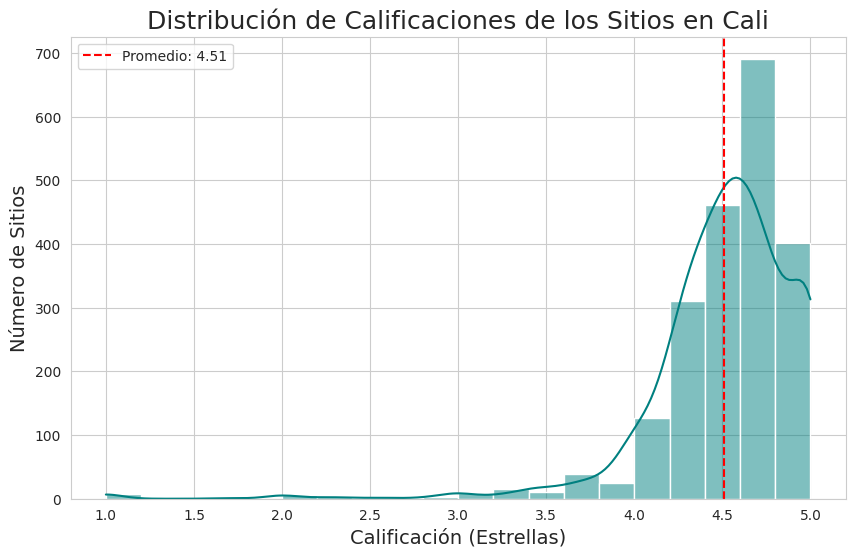

In [63]:
# --- Gráfico 1: Distribución de Calificaciones ---
# Pregunta: ¿Cómo se distribuyen las calificaciones de los sitios en Cali?
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['calificacion'].dropna(), kde=True, bins=20, color='teal')
plt.title('Distribución de Calificaciones de los Sitios en Cali')
plt.xlabel('Calificación (Estrellas)')
plt.ylabel('Número de Sitios')
plt.axvline(df_eda['calificacion'].mean(), color='red', linestyle='--', label=f"Promedio: {df_eda['calificacion'].mean():.2f}")
plt.legend()
plt.show()

/tmp/ipykernel_115938/2115448826.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


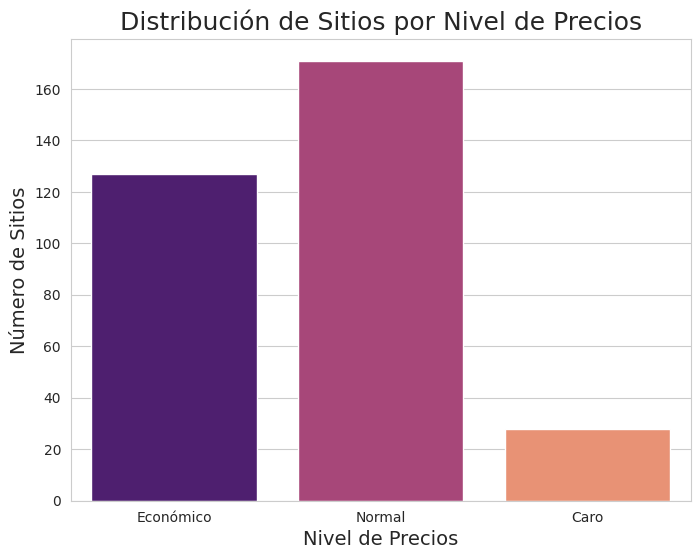

In [64]:
# --- Gráfico 2: Distribución del Nivel de Precios ---
# Pregunta: ¿Qué nivel socioeconómico predomina en la oferta turística de Cali?
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df_eda,
    x='nivel_precios',
    order=['Económico', 'Normal', 'Caro'],
    palette="magma"
)
plt.title('Distribución de Sitios por Nivel de Precios')
plt.xlabel('Nivel de Precios')
plt.ylabel('Número de Sitios')
plt.show()

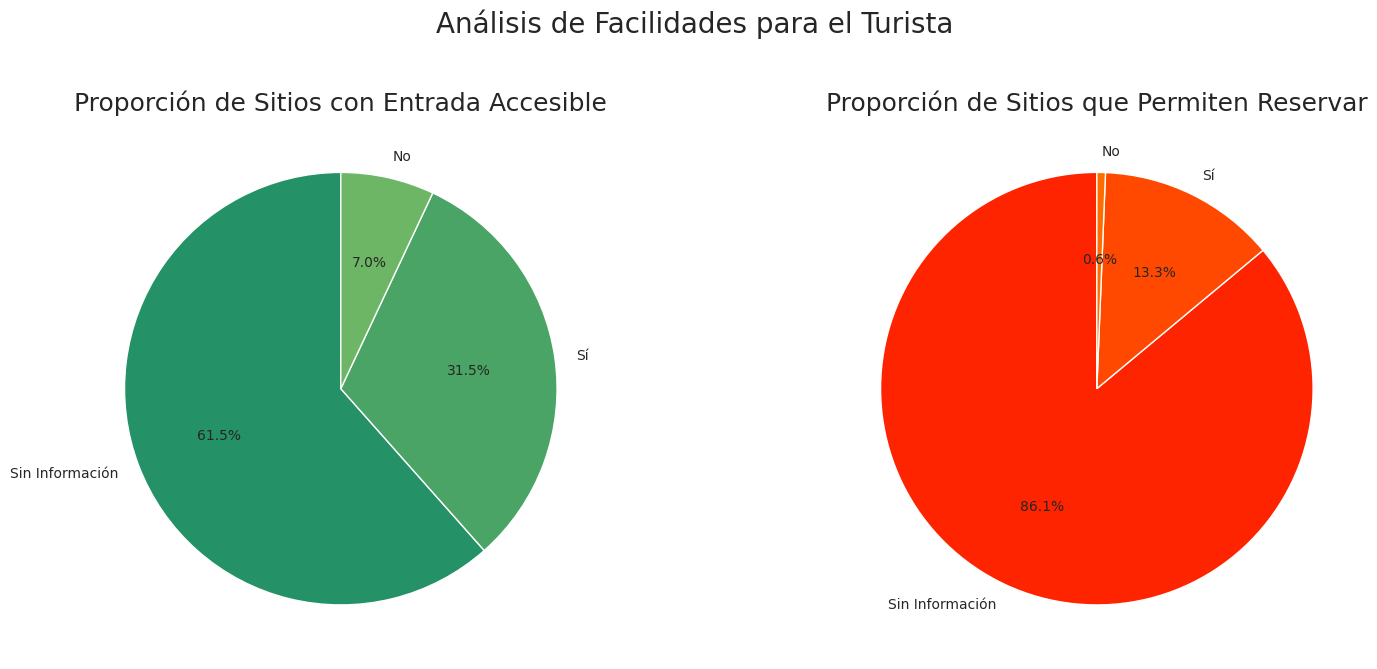

In [65]:
# --- Gráfico 3 y 4: Proporción de Accesibilidad y Reservas ---
# Preguntas: ¿Qué tan inclusiva es la ciudad? ¿Es común poder reservar?

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Análisis de Facilidades para el Turista', fontsize=20)

# Gráfico de Entrada Accesible
accesible_counts = df_eda['entrada_accesible'].value_counts(dropna=False)
accesible_counts.index = accesible_counts.index.map({True: 'Sí', False: 'No', pd.NA: 'Sin Información'})
axes[0].pie(accesible_counts, labels=accesible_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('summer'))
axes[0].set_title('Proporción de Sitios con Entrada Accesible')

# Gráfico de Reservas
reservable_counts = df_eda['es_reservable'].value_counts(dropna=False)
reservable_counts.index = reservable_counts.index.map({True: 'Sí', False: 'No', pd.NA: 'Sin Información'})
axes[1].pie(reservable_counts, labels=reservable_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('autumn'))
axes[1].set_title('Proporción de Sitios que Permiten Reservar')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

/tmp/ipykernel_115938/1672098900.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo_apertura_por_dia.index, y=conteo_apertura_por_dia.values, palette='crest')


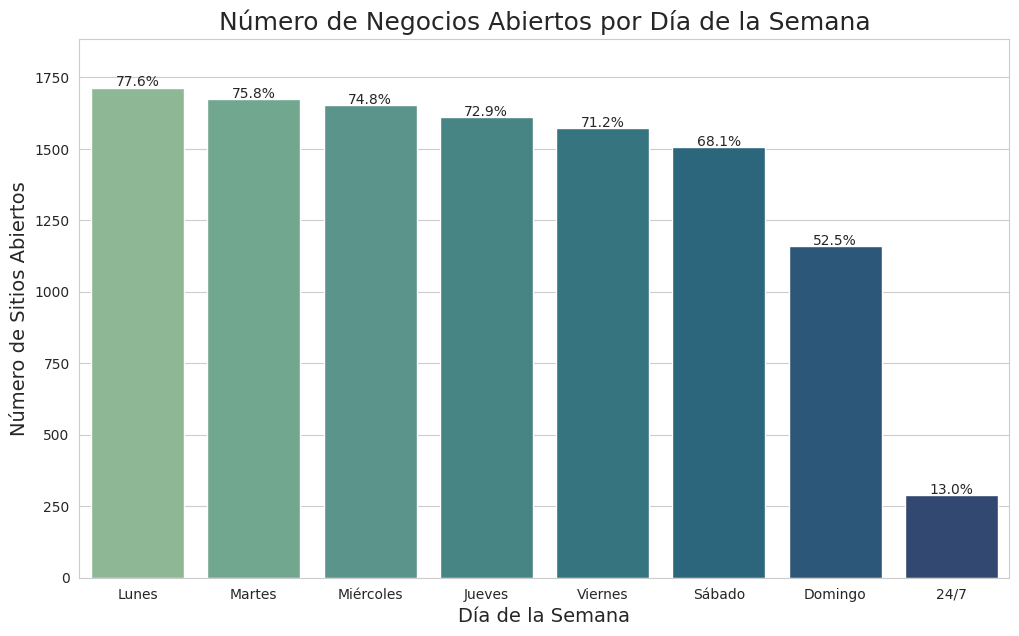

In [66]:
# --- Gráfico 5: Días de Apertura de los Negocios ---
# Pregunta: ¿Cuáles son los días más activos para los negocios en Cali?

# Calculamos el número de negocios abiertos por día
dias_semana = ['abre_lunes', 'abre_martes', 'abre_miercoles', 'abre_jueves', 'abre_viernes', 'abre_sabado', 'abre_domingo', 'abierto_24h']
conteo_apertura_por_dia = df_eda[dias_semana].sum().sort_values(ascending=False)

# Creamos etiquetas más legibles
conteo_apertura_por_dia.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo', '24/7']

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=conteo_apertura_por_dia.index, y=conteo_apertura_por_dia.values, palette='crest')

# Añadir porcentajes sobre las barras (calculado sobre el total de sitios con información de horarios)
total_con_horario = len(df_eda[dias_semana].dropna())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{100 * height / total_con_horario:.1f}%', ha="center")

plt.title('Número de Negocios Abiertos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Sitios Abiertos')
plt.ylim(0, conteo_apertura_por_dia.max() * 1.1) # Damos un poco de espacio extra arriba
plt.show()

2025-10-07 00:34:49,292 - INFO - Generando la matriz de correlación para las variables numéricas y booleanas.
2025-10-07 00:34:49,296 - INFO - Datos preparados para el cálculo de la correlación.
2025-10-07 00:34:49,302 - INFO - Matriz de correlación calculada.


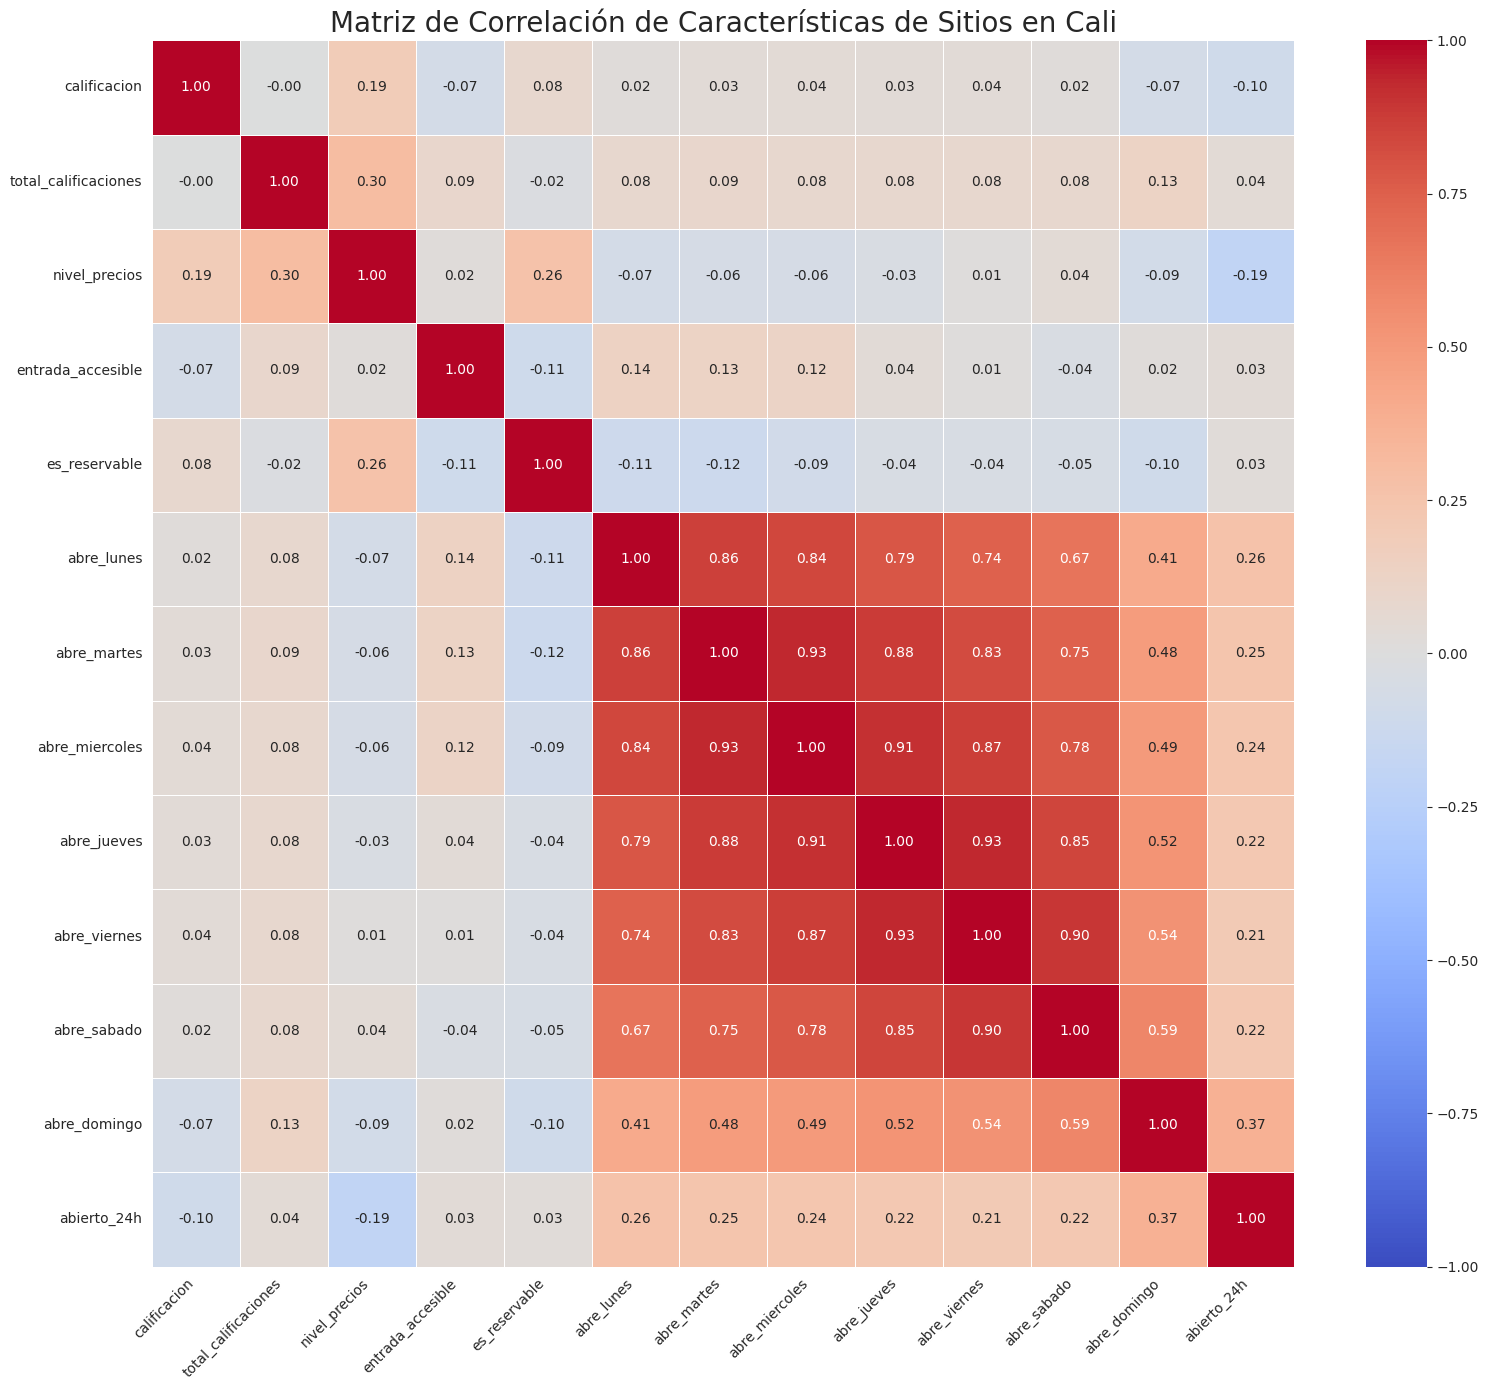

In [67]:
# --- Celda: Matriz de Correlación (CORREGIDA) ---
logging.info("Generando la matriz de correlación para las variables numéricas y booleanas.")

# --- 1. Preparación de Datos para la Correlación ---

columnas_para_correlacion = [
    'calificacion', 'total_calificaciones', 'nivel_precios',
    'entrada_accesible', 'es_reservable', 'abre_lunes', 'abre_martes', 
    'abre_miercoles', 'abre_jueves', 'abre_viernes', 'abre_sabado', 
    'abre_domingo', 'abierto_24h'
]
df_corr = df_eda[columnas_para_correlacion].copy()

# Para 'nivel_precios', usamos .cat.codes para obtener una representación numérica (NaN -> -1)
# y luego reemplazamos -1 por un NaN numérico (np.nan) para la correlación.
df_corr['nivel_precios'] = df_corr['nivel_precios'].cat.codes.replace(-1, np.nan)

# --- SOLUCIÓN AQUÍ ---
# Convertimos explícitamente las columnas booleanas a tipo 'float'.
# Esto convierte True -> 1.0, False -> 0.0, y pd.NA -> np.nan, que .corr() sí entiende.
for col in df_corr.select_dtypes(include='boolean').columns:
    df_corr[col] = df_corr[col].astype('float')

logging.info("Datos preparados para el cálculo de la correlación.")


# --- 2. Cálculo de la Matriz de Correlación ---
# Ahora el cálculo funcionará sin problemas.
corr_matrix = df_corr.corr()
logging.info("Matriz de correlación calculada.")


# --- 3. Visualización con un Heatmap (sin cambios) ---
plt.figure(figsize=(16, 14))
sns.heatmap(
    corr_matrix, 
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=.5,
    vmin=-1,
    vmax=1
)

plt.title('Matriz de Correlación de Características de Sitios en Cali', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### EDA graficas bivariado

/tmp/ipykernel_115938/1978924660.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


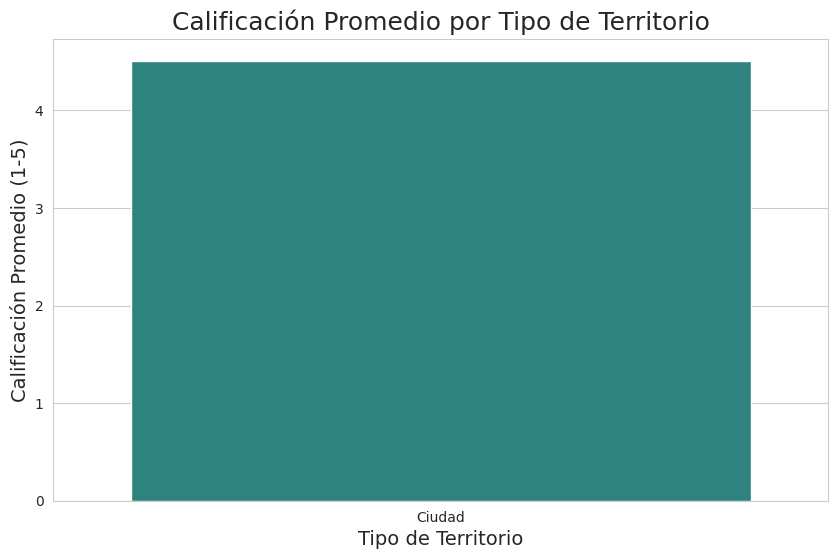

In [68]:
# --- Gráfico: Calificación Promedio por Tipo de Territorio ---
# Pregunta: ¿Qué tipo de territorio (ciudad, pueblo) tiene la mejor calificación promedio?

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_eda,
    x='tipo_territorio',
    y='calificacion',
    palette='viridis',
    estimator=np.mean, # Calculamos el promedio
    errorbar=None # Quitamos las barras de error para mayor claridad
)
plt.title('Calificación Promedio por Tipo de Territorio')
plt.xlabel('Tipo de Territorio')
plt.ylabel('Calificación Promedio (1-5)')
plt.show()

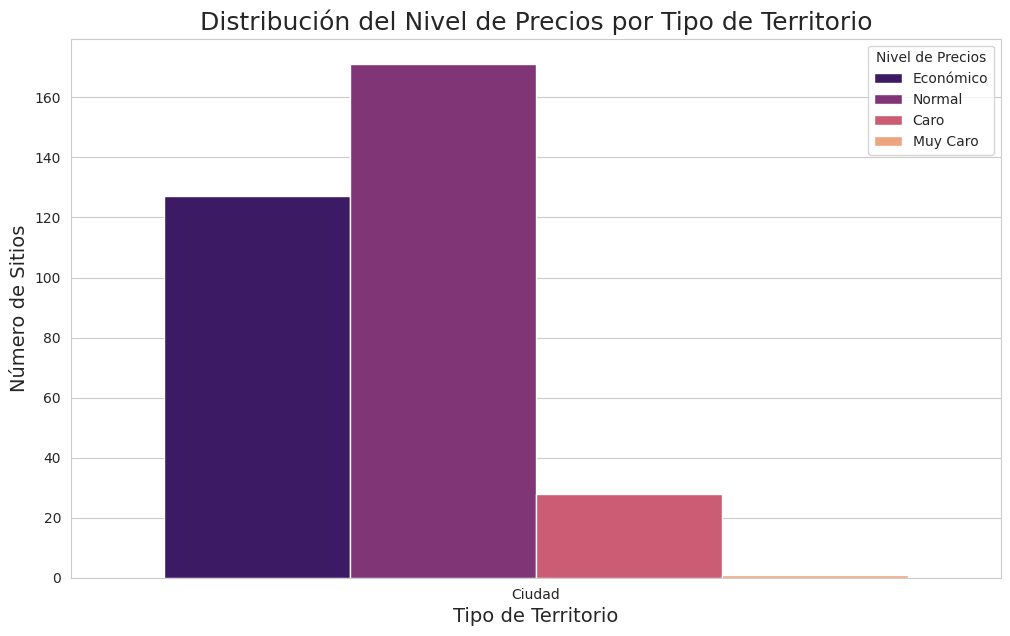

In [69]:
# --- Gráfico: Distribución de Nivel de Precios por Tipo de Territorio ---
# Pregunta: ¿Qué tan económico es visitar cada tipo de territorio?

plt.figure(figsize=(12, 7))
sns.countplot(
    data=df_eda,
    x='tipo_territorio',
    hue='nivel_precios',
    hue_order=['Económico', 'Normal', 'Caro', 'Muy Caro'],
    palette='magma'
)
plt.title('Distribución del Nivel de Precios por Tipo de Territorio')
plt.xlabel('Tipo de Territorio')
plt.ylabel('Número de Sitios')
plt.legend(title='Nivel de Precios')
plt.show()

In [70]:
# --- Celda 3 (Mejorada): Mapa de Calor Geoespacial INTERACTIVO con Folium ---
import folium
from folium.plugins import HeatMap

# Pregunta: ¿En qué zonas de Cali se concentran los puntos de interés?

logging.info("Generando mapa de calor geoespacial interactivo con Folium.")

# 1. Preparar los datos: Folium HeatMap necesita una lista de [latitud, longitud].
# Nos aseguramos de eliminar las filas donde falten las coordenadas.
heat_data = df_eda[['latitud', 'longitud']].dropna().values.tolist()

# 2. Crear un mapa base centrado en Cali.
# He usado las coordenadas aproximadas del centro de la ciudad.
# zoom_start=12 te da una buena vista general de la ciudad.
mapa_cali = folium.Map(location=[3.4516, -76.5320], zoom_start=12)

# 3. Crear y añadir la capa del mapa de calor sobre el mapa base.
# Puedes jugar con los valores de 'radius' y 'blur' para ajustar la apariencia del calor.
HeatMap(heat_data, radius=15, blur=20).add_to(mapa_cali)

logging.info("Mapa base y capa de calor creados.")

# 4. Mostrar el mapa.
# En un Jupyter Notebook, al llamar a la variable del mapa al final de la celda, este se renderizará.
print("--- Mapa Interactivo de Densidad de Sitios en Cali ---")
display(mapa_cali)

ModuleNotFoundError: No module named 'folium'

/tmp/ipykernel_40001/1148205653.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


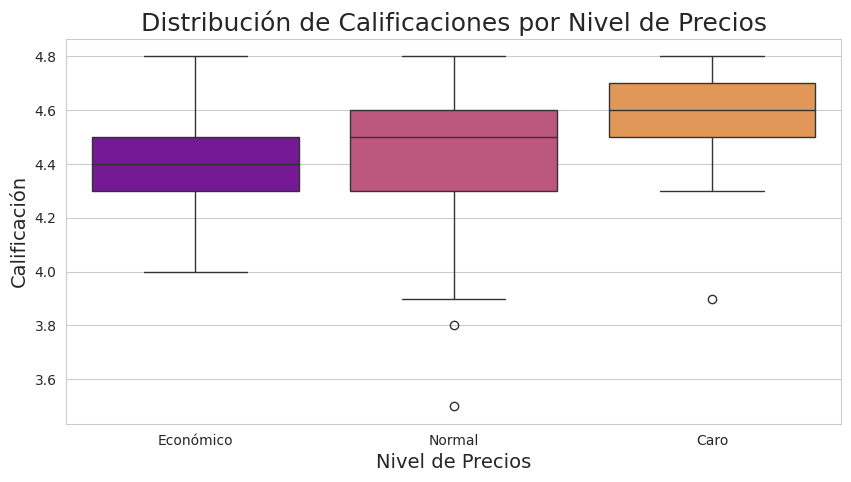

In [ ]:
# --- Gráfico: Relación entre Calificación y Nivel de Precios ---
# Pregunta: ¿Los lugares más caros están mejor calificados?

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_eda,
    x='nivel_precios',
    y='calificacion',
    order=['Económico', 'Normal', 'Caro'],
    palette='plasma'
)
plt.title('Distribución de Calificaciones por Nivel de Precios')
plt.xlabel('Nivel de Precios')
plt.ylabel('Calificación')
plt.show()

/tmp/ipykernel_40001/1624179744.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_40001/1624179744.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


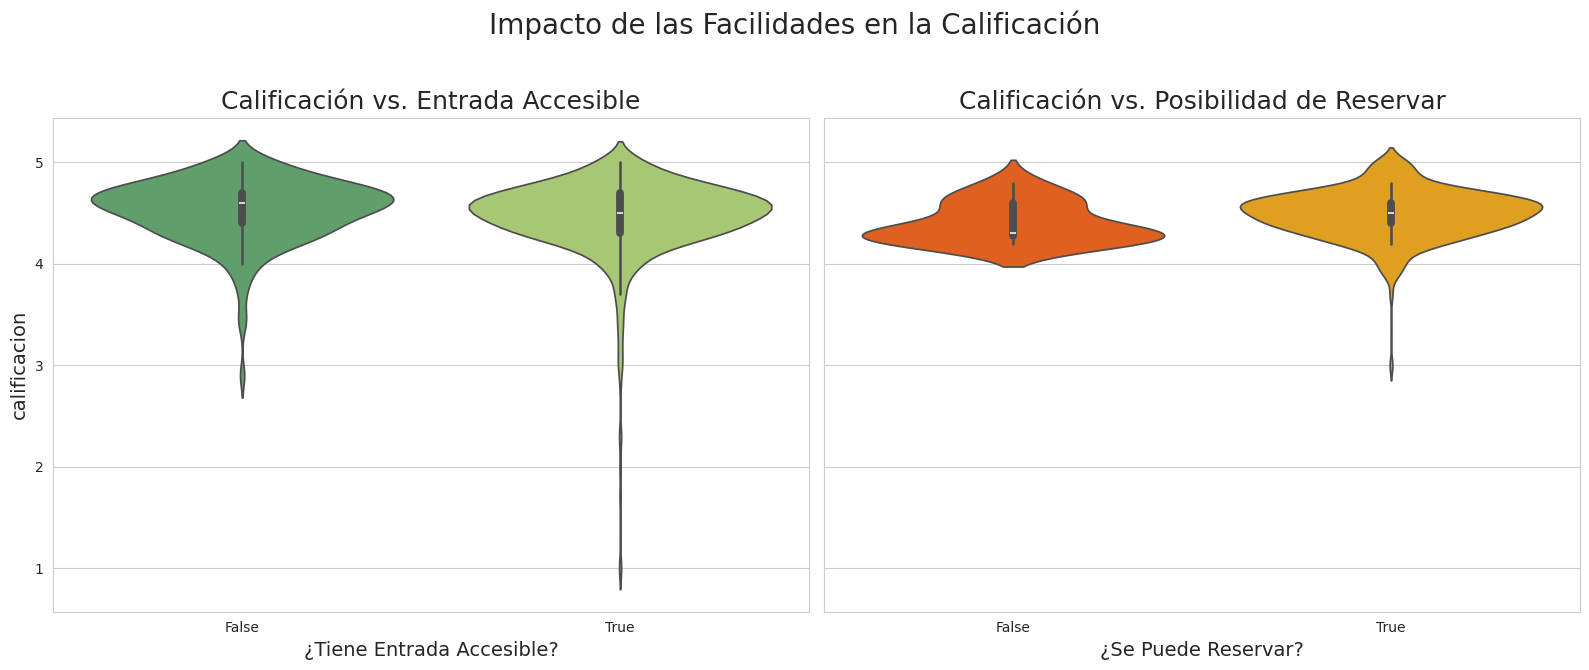

In [ ]:
# --- Celda 5 (Corregida): Calificación vs. Accesibilidad y Reservas ---
# Preguntas: ¿Son más populares los sitios accesibles? ¿Influye la reserva en la calificación?

fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)
fig.suptitle('Impacto de las Facilidades en la Calificación', fontsize=20)

# --- SOLUCIÓN: Usamos .dropna() para eliminar filas con valores nulos en las columnas graficadas ---
# Esto evita el error de comparación ambigua con pd.NA.
df_plot_accesible = df_eda.dropna(subset=['entrada_accesible', 'calificacion'])
df_plot_reservable = df_eda.dropna(subset=['es_reservable', 'calificacion'])


# Gráfico para Entrada Accesible
sns.violinplot(
    ax=axes[0],
    data=df_plot_accesible,
    x='entrada_accesible',
    y='calificacion',
    palette='summer'
)
axes[0].set_title('Calificación vs. Entrada Accesible')
axes[0].set_xlabel('¿Tiene Entrada Accesible?')

# Gráfico para Reservas
sns.violinplot(
    ax=axes[1],
    data=df_plot_reservable,
    x='es_reservable',
    y='calificacion',
    palette='autumn'
)
axes[1].set_title('Calificación vs. Posibilidad de Reservar')
axes[1].set_xlabel('¿Se Puede Reservar?')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

/tmp/ipykernel_40001/705114970.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dias_laborables = row[['abre_lunes', 'abre_martes', 'abre_miercoles', 'abre_jueves']].fillna(False).astype(int).sum()
/tmp/ipykernel_40001/705114970.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fin_de_semana = row[['abre_viernes', 'abre_sabado', 'abre_domingo']].fillna(False).astype(int).sum()
/tmp/ipykernel_40001/705114970.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call resul

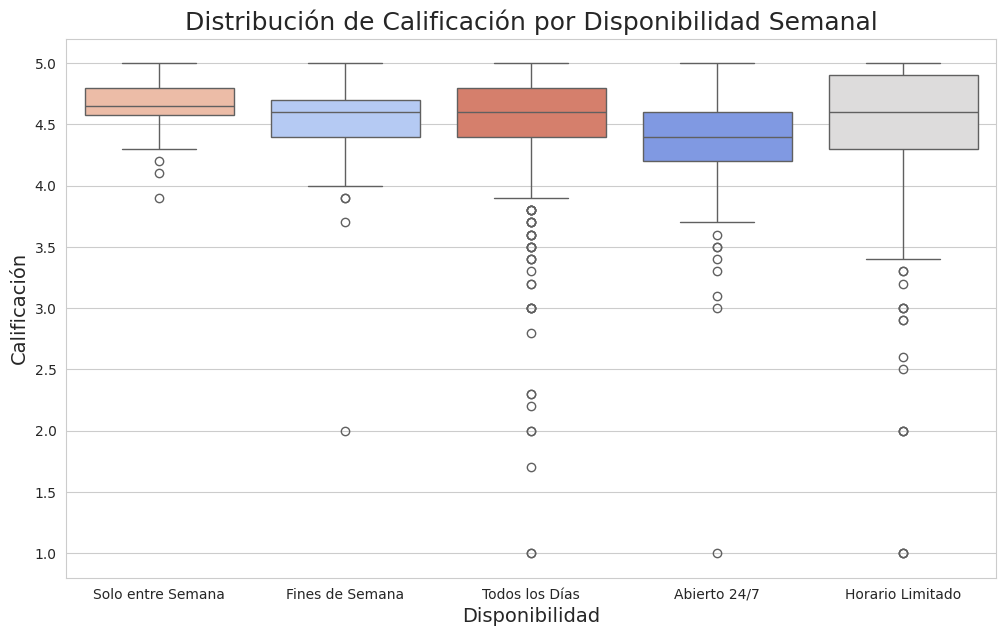

In [ ]:
# --- Gráfico: Calificación por Disponibilidad Semanal ---
# Pregunta: ¿Tienen mejor calificación los lugares que abren más días?

# 1. Crear categorías de disponibilidad
def categorizar_apertura(row):
    # Manejo explícito de valores NA para evitar el TypeError
    if pd.notna(row['abierto_24h']) and row['abierto_24h']:
        return 'Abierto 24/7'
    
    # SOLUCIÓN PARA ELIMINAR EL FUTUREWARNING de "Downcasting":
    # Convertimos explícitamente a tipo numérico antes de sumar.
    # fillna(False) convierte los NA a False, y .astype(int) convierte True->1 y False->0.
    dias_laborables = row[['abre_lunes', 'abre_martes', 'abre_miercoles', 'abre_jueves']].fillna(False).astype(int).sum()
    fin_de_semana = row[['abre_viernes', 'abre_sabado', 'abre_domingo']].fillna(False).astype(int).sum()
    
    if dias_laborables >= 4 and fin_de_semana >= 2:
        return 'Todos los Días'
    elif fin_de_semana >= 2:
        return 'Fines de Semana'
    elif dias_laborables >= 4:
        return 'Solo entre Semana'
    else:
        return 'Horario Limitado'

df_eda['disponibilidad_semanal'] = df_eda.apply(categorizar_apertura, axis=1).astype('category')

# 2. Graficar
plt.figure(figsize=(12, 7))

# SOLUCIÓN PARA ELIMINAR EL FUTUREWARNING de "palette":
# Asignamos la variable 'x' también a 'hue' y desactivamos la leyenda.
sns.boxplot(
    data=df_eda,
    x='disponibilidad_semanal',
    y='calificacion',
    hue='disponibilidad_semanal', # <-- Cambio aquí
    legend=False,                 # <-- Cambio aquí
    order=['Solo entre Semana', 'Fines de Semana', 'Todos los Días', 'Abierto 24/7', 'Horario Limitado'],
    palette='coolwarm'
)

plt.title('Distribución de Calificación por Disponibilidad Semanal')
plt.xlabel('Disponibilidad')
plt.ylabel('Calificación')
plt.show()

/tmp/ipykernel_40001/1744524097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


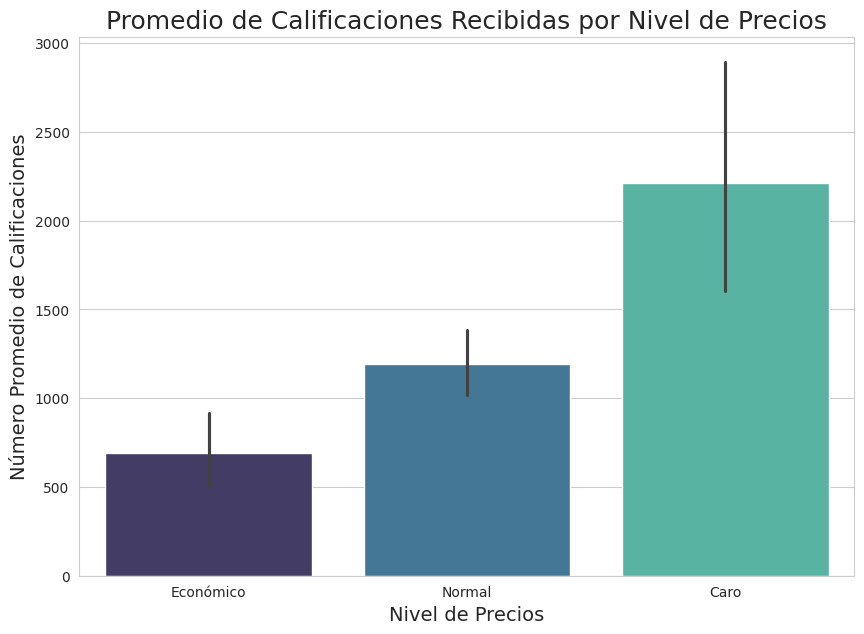

In [ ]:
# --- Gráfico: Total de Calificaciones vs. Nivel de Precios ---
# Pregunta: ¿Reciben más calificaciones los lugares económicos?

plt.figure(figsize=(10, 7))
sns.barplot(
    data=df_eda,
    x='nivel_precios',
    y='total_calificaciones',
    order=['Económico', 'Normal', 'Caro'],
    palette='mako',
    estimator=np.mean
)
plt.title('Promedio de Calificaciones Recibidas por Nivel de Precios')
plt.xlabel('Nivel de Precios')
plt.ylabel('Número Promedio de Calificaciones')
plt.show()

### EDA graficas multivariado

In [ ]:
# --- Celda: Preparación del DataFrame para Análisis de Tags ("Explode") ---
logging.info("Creando un DataFrame 'explotado' para el análisis detallado de tags.")

# Copiamos para no modificar el df_eda principal
df_tags_eda = df_eda.copy()

# Convertimos la columna 'tags' (que es string) a listas reales de Python
df_tags_eda['tags'] = df_tags_eda['tags'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Usamos .explode() para duplicar las filas por cada tag en la lista
df_tags_eda = df_tags_eda.explode('tags')

logging.info(f"DataFrame 'explotado' creado. Ahora tiene {len(df_tags_eda)} filas.")
print("Vista previa del DataFrame con tags individuales:")
display(df_tags_eda[['nombre', 'tags']].head(20))

2025-09-24 19:18:13,499 - INFO - Creando un DataFrame 'explotado' para el análisis detallado de tags.
2025-09-24 19:18:13,561 - INFO - DataFrame 'explotado' creado. Ahora tiene 7587 filas.


Vista previa del DataFrame con tags individuales:


,nombre,tags
0,la casona valluna,establishment
0,la casona valluna,food
0,la casona valluna,point_of_interest
0,la casona valluna,restaurant
1,cantina la 15 granada cali norte,bar
1,cantina la 15 granada cali norte,establishment
1,cantina la 15 granada cali norte,food
1,cantina la 15 granada cali norte,point_of_interest
1,cantina la 15 granada cali norte,restaurant
2,restaurante los amigos,establishment


In [ ]:
# Obtener la lista de tags únicos
unique_tags = df_tags_eda['tags'].unique().tolist()

# Imprimir la cantidad de tags únicos y la lista completa
print(f"Se encontraron {len(unique_tags)} categorías únicas en total.")
print("\n--- Lista de Todas las Categorías Únicas ---")
# Usamos sorted() para que la lista sea más fácil de leer
print(unique_tags)

Se encontraron 60 categorías únicas en total.

--- Lista de Todas las Categorías Únicas ---
['establishment', 'food', 'point_of_interest', 'restaurant', 'bar', 'store', 'lodging', 'night_club', 'meal_delivery', 'cafe', 'bakery', 'art_gallery', 'general_contractor', 'library', 'grocery_or_supermarket', 'supermarket', 'meal_takeaway', 'movie_theater', 'shopping_mall', 'school', 'book_store', 'health', 'department_store', 'museum', 'tourist_attraction', 'travel_agency', 'church', 'place_of_worship', 'park', 'home_goods_store', 'local_government_office', 'neighborhood', 'political', 'zoo', 'gym', 'spa', 'clothing_store', 'beauty_salon', 'campground', 'amusement_park', 'real_estate_agency', 'convenience_store', 'physiotherapist', 'parking', 'atm', 'finance', 'hardware_store', 'jewelry_store', 'furniture_store', 'florist', 'bank', 'hair_care', 'doctor', 'casino', 'hospital', 'electronics_store', 'rv_park', 'liquor_store', 'storage', nan]


In [ ]:
# --- Celda: Mapeo de Tags a Categorías Principales ---
import pandas as pd
import ast

# Asegúrate de que df_eda esté disponible y contenga la columna 'tags'
# Si no, carga tu dataset aquí. df_tags_eda ya está explotado.

logging.info("Iniciando la creación de categorías principales a partir de los tags.")

# Diccionario para mapear tags específicos a categorías generales
# Añadimos la categoría 'Servicios y Otros' para clasificar el resto.
tag_to_category_map = {
    # Gastronomia
    'food': 'Gastronomia', 'restaurant': 'Gastronomia', 'meal_delivery': 'Gastronomia',
    'cafe': 'Gastronomia', 'bakery': 'Gastronomia', 'meal_takeaway': 'Gastronomia',
    'grocery_or_supermarket': 'Gastronomia', 'supermarket': 'Gastronomia', 'liquor_store': 'Gastronomia',
    'bar': 'Gastronomia',

    # Alojamiento
    'lodging': 'Alojamiento', 'campground': 'Alojamiento', 'rv_park': 'Alojamiento',
    
    # Cultural y Entretenimiento
    'art_gallery': 'Cultural y Entretenimiento', 'museum': 'Cultural y Entretenimiento', 
    'tourist_attraction': 'Cultural y Entretenimiento', 'church': 'Cultural y Entretenimiento',
    'place_of_worship': 'Cultural y Entretenimiento', 'zoo': 'Cultural y Entretenimiento',
    'amusement_park': 'Cultural y Entretenimiento', 'casino': 'Cultural y Entretenimiento',
    'movie_theater': 'Cultural y Entretenimiento', 'night_club': 'Cultural y Entretenimiento',
    'library': 'Cultural y Entretenimiento',

    # Naturaleza y Recreación
    'park': 'Naturaleza y Recreación',
    
    # Comercio y Compras
    'store': 'Comercio y Compras', 'point_of_interest': 'Comercio y Compras', 
    'shopping_mall': 'Comercio y Compras', 'department_store': 'Comercio y Compras',
    'home_goods_store': 'Comercio y Compras', 'clothing_store': 'Comercio y Compras',
    'book_store': 'Comercio y Compras', 'convenience_store': 'Comercio y Compras',
    'hardware_store': 'Comercio y Compras', 'jewelry_store': 'Comercio y Compras',
    'furniture_store': 'Comercio y Compras', 'florist': 'Comercio y Compras',
    'electronics_store': 'Comercio y Compras', 'storage': 'Comercio y Compras',
    
    # Servicios y Otros
    'health': 'Servicios y Otros', 'physiotherapist': 'Servicios y Otros', 
    'beauty_salon': 'Servicios y Otros', 'hair_care': 'Servicios y Otros', 'spa': 'Servicios y Otros',
    'gym': 'Servicios y Otros', 'doctor': 'Servicios y Otros', 'hospital': 'Servicios y Otros',
    'school': 'Servicios y Otros', 'travel_agency': 'Servicios y Otros', 'real_estate_agency': 'Servicios y Otros',
    'parking': 'Servicios y Otros', 'atm': 'Servicios y Otros', 'finance': 'Servicios y Otros',
    'bank': 'Servicios y Otros', 'local_government_office': 'Servicios y Otros',
    'establishment': 'Servicios y Otros', 'general_contractor': 'Servicios y Otros',
    'neighborhood': 'Servicios y Otros', 'political': 'Servicios y Otros'
}

# Aplicamos el mapeo para crear la nueva columna
df_tags_eda['categoria_principal'] = df_tags_eda['tags'].map(tag_to_category_map).fillna('Indefinido')

logging.info("Columna 'categoria_principal' creada exitosamente.")
print("Vista previa del DataFrame con la nueva categoría principal:")
display(df_tags_eda[['nombre', 'tags', 'categoria_principal']].head(10))

2025-09-24 19:18:13,611 - INFO - Iniciando la creación de categorías principales a partir de los tags.
2025-09-24 19:18:13,619 - INFO - Columna 'categoria_principal' creada exitosamente.


Vista previa del DataFrame con la nueva categoría principal:


,nombre,tags,categoria_principal
0,la casona valluna,establishment,Servicios y Otros
0,la casona valluna,food,Gastronomia
0,la casona valluna,point_of_interest,Comercio y Compras
0,la casona valluna,restaurant,Gastronomia
1,cantina la 15 granada cali norte,bar,Gastronomia
1,cantina la 15 granada cali norte,establishment,Servicios y Otros
1,cantina la 15 granada cali norte,food,Gastronomia
1,cantina la 15 granada cali norte,point_of_interest,Comercio y Compras
1,cantina la 15 granada cali norte,restaurant,Gastronomia
2,restaurante los amigos,establishment,Servicios y Otros


In [ ]:
# --- Celda 4: Saneamiento de Datos (Versión Final Definitiva y a Prueba de Fallos) ---
import pandas as pd
import ast
import html
import numpy as np

logging.info("Iniciando el saneamiento de datos (versión definitiva) para el mapa.")

# 1. Agrupar los datos (sin cambios)
df_mapa_agrupado = df_tags_eda.groupby(['nombre', 'latitud', 'longitud']).agg({
    'categoria_principal': lambda x: list(x.unique()),
    'calificacion': 'first',
    'total_calificaciones': 'first',
    'nivel_precios': 'first',
    'tipo_telefono': 'first'
}).reset_index()

df_mapa_saneado = df_mapa_agrupado.copy()

# --- INICIO DE LA LIMPIEZA AGRESIVA ---

# 2. Eliminar filas con coordenadas no válidas o nulas
df_mapa_saneado.dropna(subset=['latitud', 'longitud'], inplace=True)
df_mapa_saneado['latitud'] = pd.to_numeric(df_mapa_saneado['latitud'], errors='coerce')
df_mapa_saneado['longitud'] = pd.to_numeric(df_mapa_saneado['longitud'], errors='coerce')
df_mapa_saneado.dropna(subset=['latitud', 'longitud'], inplace=True)

# 3. Eliminar filas con nombres vacíos o nulos
df_mapa_saneado.dropna(subset=['nombre'], inplace=True)
df_mapa_saneado = df_mapa_saneado[df_mapa_saneado['nombre'].str.strip() != '']

# 4. Limpieza exhaustiva de 'categoria_principal'
df_mapa_saneado['categoria_principal'] = df_mapa_saneado['categoria_principal'].apply(
    lambda categorias: [cat for cat in categorias if pd.notna(cat) and cat != 'Indefinido']
)
df_mapa_saneado = df_mapa_saneado[df_mapa_saneado['categoria_principal'].apply(len) > 0]

# 5. Función para limpiar texto para HTML/JS
def limpiar_texto_para_mapa(texto):
    if not isinstance(texto, str):
        texto = str(texto)
    return html.escape(texto, quote=True)

# 6. Saneamiento de las columnas restantes
df_mapa_saneado['categoria_principal_str'] = df_mapa_saneado['categoria_principal'].apply(
    lambda x: limpiar_texto_para_mapa(', '.join(map(str, x)))
)
columnas_texto = ['nombre', 'nivel_precios', 'tipo_telefono']
for col in columnas_texto:
    if col in df_mapa_saneado.columns:
        df_mapa_saneado[col] = df_mapa_saneado[col].astype(object).fillna('N/A').apply(limpiar_texto_para_mapa)

columnas_num = ['calificacion', 'total_calificaciones']
for col in columnas_num:
    if col in df_mapa_saneado.columns:
        df_mapa_saneado[col] = pd.to_numeric(df_mapa_saneado[col], errors='coerce').fillna(0) # Rellenamos con 0 para evitar errores

logging.info("Saneamiento de datos definitivo completado.")
print("Vista previa del DataFrame final para el mapa:")
display(df_mapa_saneado.head())

print(f"\nEl DataFrame final tiene {len(df_mapa_saneado)} puntos de interés únicos y válidos para mapear.")

2025-09-24 19:18:13,640 - INFO - Iniciando el saneamiento de datos (versión definitiva) para el mapa.
2025-09-24 19:18:13,803 - INFO - Saneamiento de datos definitivo completado.


Vista previa del DataFrame final para el mapa:


,nombre,latitud,longitud,categoria_principal,calificacion,total_calificaciones,nivel_precios,tipo_telefono,categoria_principal_str
1,hotel en cali hotel orduz cali hotel centro...,3.449,-76.536,"[Servicios y Otros, Alojamiento, Comercio y Co...",3.700,27,N/A,Móvil,"Servicios y Otros, Alojamiento, Comercio y Com..."
2,la expresin del alma,3.447,-76.538,"[Servicios y Otros, Comercio y Compras]",5.000,149,N/A,Móvil,"Servicios y Otros, Comercio y Compras"
3,1000 antiguedades el pulguero casa anticuario ...,3.435,-76.518,"[Comercio y Compras, Servicios y Otros]",4.400,45,N/A,Móvil,"Comercio y Compras, Servicios y Otros"
4,110 loft cali granada suite luxury,3.457,-76.536,"[Servicios y Otros, Alojamiento, Comercio y Co...",3.500,4,N/A,Móvil,"Servicios y Otros, Alojamiento, Comercio y Com..."
5,1963 specialty coffee,3.437,-76.542,"[Gastronomia, Servicios y Otros, Comercio y Co...",5.000,4,N/A,Móvil,"Gastronomia, Servicios y Otros, Comercio y Com..."



El DataFrame final tiene 2016 puntos de interés únicos y válidos para mapear.


In [ ]:
# --- Celda 5: Mapa Geoespacial Interactivo (Versión Final y Funcional) ---
import folium
from folium.plugins import MarkerCluster
import pandas as pd

logging.info("Generando mapa interactivo con clústeres anidados en capas controlables.")

# 1. Crear un mapa base
mapa_final_cali = folium.Map(
    location=[3.4516, -76.5320], 
    zoom_start=13,
    tiles="cartodbpositron"
)

# 2. Definir colores
colores_validos = {
    'Gastronomia': 'red', 'Alojamiento': 'blue', 'Cultural y Entretenimiento': 'purple',
    'Naturaleza y Recreación': 'green', 'Comercio y Compras': 'orange',
    'Servicios y Otros': 'gray'
}

# 3. Crear un FeatureGroup para cada categoría. Esta será la capa visible en el control.
categorias_unicas_finales = df_mapa_saneado['categoria_principal'].explode().unique()
capas_de_categoria = {}

for categoria in categorias_unicas_finales:
    # Creamos la capa principal que el usuario podrá activar/desactivar
    # y la añadimos al mapa.
    capas_de_categoria[categoria] = folium.FeatureGroup(name=categoria, show=True).add_to(mapa_final_cali)

# 4. Iterar sobre los datos SANEADOS y añadir marcadores a la capa correcta
#for idx, row in df_mapa_saneado.iterrows():
 #   popup_html = f"""
  #  <b>Nombre:</b> {row['nombre'].title()}<br>
   # <b>Categorías:</b> {row['categoria_principal_str']}<br>
#    <b>Calificación:</b> {row['calificacion'] if pd.notna(row['calificacion']) else 'N/A'}<br>
 #   <b>Total Calificaciones:</b> {int(row['total_calificaciones']) if pd.notna(row['total_calificaciones']) else 'N/A'}
  #  """
   # popup = folium.Popup(folium.IFrame(popup_html, width=250, height=100))
#    
 #   # Un lugar puede pertenecer a múltiples categorías
  #  for categoria in row['categoria_principal']:
   #     if categoria in capas_de_categoria:
    #        # Añadimos el marcador directamente al FeatureGroup de su categoría
     #       folium.Marker(
      #          location=[row['latitud'], row['longitud']],
       #         popup=popup,
        #        tooltip=row['nombre'].title(),
         #       icon=folium.Icon(color=colores_validos.get(categoria, 'lightgray'))
          #  ).add_to(capas_de_categoria[categoria])

# --- MEJORA DE RENDIMIENTO OPCIONAL PERO RECOMENDADA ---
# # Si tienes muchos marcadores y el mapa se siente lento, puedes añadir un MarkerCluster a cada capa
# # Descomenta las siguientes líneas y comenta el bloque 4 si es necesario.
#
marker_clusters = {}
for categoria in categorias_unicas_finales:
    fg = folium.FeatureGroup(name=categoria, show=True).add_to(mapa_final_cali)
    cluster = MarkerCluster().add_to(fg)
    marker_clusters[categoria] = cluster

for idx, row in df_mapa_saneado.iterrows():
    popup = folium.Popup(f"<b>{row['nombre'].title()}</b>")
    for categoria in row['categoria_principal']:
        if categoria in marker_clusters:
            folium.Marker(
                location=[row['latitud'], row['longitud']],
                popup=popup,
                tooltip=row['nombre'].title(),
                icon=folium.Icon(color=colores_validos.get(categoria, 'lightgray'))
            ).add_to(marker_clusters[categoria])


# 5. Añadir el control de capas al final
folium.LayerControl().add_to(mapa_final_cali)

# 6. Guardar el mapa
mapa_final_cali.save('mapa_final_cali_funcional.html')

logging.info("Mapa interactivo final guardado.")
print("--- Mapa guardado. Por favor, abre 'mapa_final_cali_funcional.html' en tu navegador. ---")

# 7. Mostrar el mapa
mapa_final_cali

2025-09-24 19:18:13,867 - INFO - Generando mapa interactivo con clústeres anidados en capas controlables.
2025-09-24 19:18:26,937 - INFO - Mapa interactivo final guardado.


--- Mapa guardado. Por favor, abre 'mapa_final_cali_funcional.html' en tu navegador. ---


In [ ]:
'''
# --- Celda de Depuración: Ejemplo Mínimo y Aislado ---
import folium
from folium.plugins import MarkerCluster

print("Ejecutando una prueba con un dataset mínimo para diagnosticar el problema...")

# 1. Crear un mapa base limpio
mapa_de_prueba = folium.Map(location=[3.4516, -76.5320], zoom_start=13, tiles="cartodbpositron")

# 2. Datos de prueba simples y perfectos
datos_de_prueba = [
    {'lat': 3.4516, 'lon': -76.5320, 'nombre': 'Restaurante Central', 'categoria': 'Gastronomia'},
    {'lat': 3.4520, 'lon': -76.5330, 'nombre': 'Parrilla del Centro', 'categoria': 'Gastronomia'},
    {'lat': 3.4600, 'lon': -76.5200, 'nombre': 'Museo de la Ciudad', 'categoria': 'Cultural'},
    {'lat': 3.4610, 'lon': -76.5210, 'nombre': 'Teatro Municipal', 'categoria': 'Cultural'},
    {'lat': 3.4400, 'lon': -76.5400, 'nombre': 'Hotel del Río', 'categoria': 'Alojamiento'}
]

# 3. Crear un MarkerCluster para cada categoría y añadirlo al mapa
categorias_prueba = ['Gastronomia', 'Cultural', 'Alojamiento']
clusters_prueba = {}
for categoria in categorias_prueba:
    clusters_prueba[categoria] = MarkerCluster(name=categoria).add_to(mapa_de_prueba)

# 4. Añadir los marcadores a su clúster correspondiente
for punto in datos_de_prueba:
    categoria_punto = punto['categoria']
    folium.Marker(
        location=[punto['lat'], punto['lon']],
        popup=f"<b>{punto['nombre']}</b><br>Categoría: {categoria_punto}",
        icon=folium.Icon(color='red' if categoria_punto == 'Gastronomia' else 'blue' if categoria_punto == 'Alojamiento' else 'purple')
    ).add_to(clusters_prueba[categoria_punto])

# 5. Añadir el control de capas al final
folium.LayerControl().add_to(mapa_de_prueba)

# 6. Guardar el mapa de prueba en un archivo HTML
mapa_de_prueba.save('mapa_de_prueba.html')
print("--- Mapa de prueba guardado en 'mapa_de_prueba.html'. Por favor, abre este archivo en tu navegador. ---")

# Mostrar el mapa de prueba
mapa_de_prueba
'''

'\n# --- Celda de Depuración: Ejemplo Mínimo y Aislado ---\nimport folium\nfrom folium.plugins import MarkerCluster\n\nprint("Ejecutando una prueba con un dataset mínimo para diagnosticar el problema...")\n\n# 1. Crear un mapa base limpio\nmapa_de_prueba = folium.Map(location=[3.4516, -76.5320], zoom_start=13, tiles="cartodbpositron")\n\n# 2. Datos de prueba simples y perfectos\ndatos_de_prueba = [\n    {\'lat\': 3.4516, \'lon\': -76.5320, \'nombre\': \'Restaurante Central\', \'categoria\': \'Gastronomia\'},\n    {\'lat\': 3.4520, \'lon\': -76.5330, \'nombre\': \'Parrilla del Centro\', \'categoria\': \'Gastronomia\'},\n    {\'lat\': 3.4600, \'lon\': -76.5200, \'nombre\': \'Museo de la Ciudad\', \'categoria\': \'Cultural\'},\n    {\'lat\': 3.4610, \'lon\': -76.5210, \'nombre\': \'Teatro Municipal\', \'categoria\': \'Cultural\'},\n    {\'lat\': 3.4400, \'lon\': -76.5400, \'nombre\': \'Hotel del Río\', \'categoria\': \'Alojamiento\'}\n]\n\n# 3. Crear un MarkerCluster para cada categoría y

In [ ]:
"""
# 2. Crear un mapa base centrado en Cali
mapa_cali_categorizado = folium.Map(
    location=[3.4516, -76.5320], 
    zoom_start=13, 
    tiles='CartoDB positron',
    width=800,  # Ancho en píxeles
    height=600  # Alto en píxeles
)
"""

"\n# 2. Crear un mapa base centrado en Cali\nmapa_cali_categorizado = folium.Map(\n    location=[3.4516, -76.5320], \n    zoom_start=13, \n    tiles='CartoDB positron',\n    width=800,  # Ancho en píxeles\n    height=600  # Alto en píxeles\n)\n"